# Women's imprisonment rates
## Local factsheet: Visualisations

We have three separate visualisations to create here:
* Line chart — Use of immediate imprisonment for women, 2009-2021 
* Pie chart (or equivalent) — Imprisonment of women by offence group, 2021
* Grouped bar chart — Sentencing of women to Community Orders, Suspended Sentences and Immediate Imprisonment, 2009-2021

This notebook will produce the first chart: Line chart — Use of immediate imprisonment for women, 2009-2021 

## Importing libraries

In [1]:
import pandas as pd
import textwrap
import plotly.graph_objs as go
import plotly.io as pio
from pathlib import Path #To create unique filenames for each PFA chart

### Setting template

In [2]:
pio.templates
prt_template = go.layout.Template(
    layout=go.Layout(
        title_font=dict(family="Helvetica Neue, Arial", size=17),
        font_color="#54565B",
        font_family="Helvetica Neue, Arial",
        font_size=12,
        paper_bgcolor="#FBFAF7",
        plot_bgcolor="#FBFAF7",
        colorway=("#A01D28", "#499CC9", "#F9A237", "#6FBA3A", "#573D6B"),
    )
)

config = dict(
    {
        "scrollZoom": False,
        "displayModeBar": False,
        "editable": False,
        "displaylogo": False,
        "showAxisDragHandles": False,
    }
)

## Chart 1: Use of immediate imprisonment for women, 2009–21

#### Reading in data

In [3]:
df = pd.read_csv('../data/interim/PFA_2009-21_women_cust_sentence_len.csv')

In [4]:
df.head()

pfa  year                  sentence_len  freq
0  Avon and Somerset  2009             12 months or more    37
1  Avon and Somerset  2009  6 months and under 12 months    11
2  Avon and Somerset  2009            Less than 6 months   117
3  Avon and Somerset  2010             12 months or more    44
4  Avon and Somerset  2010  6 months and under 12 months    16

#### Replacing 6 months and under 12 months to something more chart friendly

In [5]:
df['sentence_len'] = df['sentence_len'].str.replace("6 months and under 12 months", "6 months–<br>under 12 months")

## Development

#### Selecting a subset of the dataframe to test loop

In [6]:
filt = df['pfa'].isin(["Avon and Somerset", "Derbyshire", "Wiltshire"])
df_filt = df[filt]
df_filt

pfa  year                  sentence_len  freq
0     Avon and Somerset  2009             12 months or more    37
1     Avon and Somerset  2009  6 months–<br>under 12 months    11
2     Avon and Somerset  2009            Less than 6 months   117
3     Avon and Somerset  2010             12 months or more    44
4     Avon and Somerset  2010  6 months–<br>under 12 months    16
...                 ...   ...                           ...   ...
1626          Wiltshire  2020  6 months–<br>under 12 months     6
1627          Wiltshire  2020            Less than 6 months    15
1628          Wiltshire  2021             12 months or more    15
1629          Wiltshire  2021  6 months–<br>under 12 months     3
1630          Wiltshire  2021            Less than 6 months    15

[117 rows x 4 columns]

In [7]:
df_filt['pfa'].unique()

array(['Avon and Somerset', 'Derbyshire', 'Wiltshire'], dtype=object)

#### Testing loop to plot a chart for each PFA with three traces each

In [8]:
for pfa in df_filt['pfa'].unique():
    pfa_df = df_filt[df_filt["pfa"] == pfa]
    trace_list = [] # Need to empty my trace_list with every loop through each PFA so that charts are plotted separately

    for i in pfa_df["sentence_len"].unique():  # Creating a for loop to extract unique values from the dataframe and make traces
        pfa_df_sentence = pfa_df[pfa_df["sentence_len"] == i]
        
        trace = go.Scatter(
            x=pfa_df_sentence["year"],
            y=pfa_df_sentence["freq"],
            mode="lines",
            name=str(pfa_df_sentence["sentence_len"].iloc[0]),
            meta=pfa_df_sentence["pfa"].iloc[0],   # Adding name of PFA in metadata to ensure data relates to only one area 
            hovertemplate="%{y}<extra></extra>"
        )

        trace_list.append(trace)

    print(trace_list)

[Scatter({
    'hovertemplate': '%{y}<extra></extra>',
    'meta': 'Avon and Somerset',
    'mode': 'lines',
    'name': '12 months or more',
    'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                2021]),
    'y': array([37, 44, 43, 38, 33, 38, 31, 47, 35, 33, 38, 24, 32])
}), Scatter({
    'hovertemplate': '%{y}<extra></extra>',
    'meta': 'Avon and Somerset',
    'mode': 'lines',
    'name': '6 months–<br>under 12 months',
    'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                2021]),
    'y': array([11, 16, 21, 12, 10, 14,  8, 12, 15, 18, 24,  8,  7])
}), Scatter({
    'hovertemplate': '%{y}<extra></extra>',
    'meta': 'Avon and Somerset',
    'mode': 'lines',
    'name': 'Less than 6 months',
    'x': array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
                2021]),
    'y': array([117, 113, 142, 119, 134, 144, 126, 105, 108,  97,  89,  71,  64])


#### Running test loop to output charts

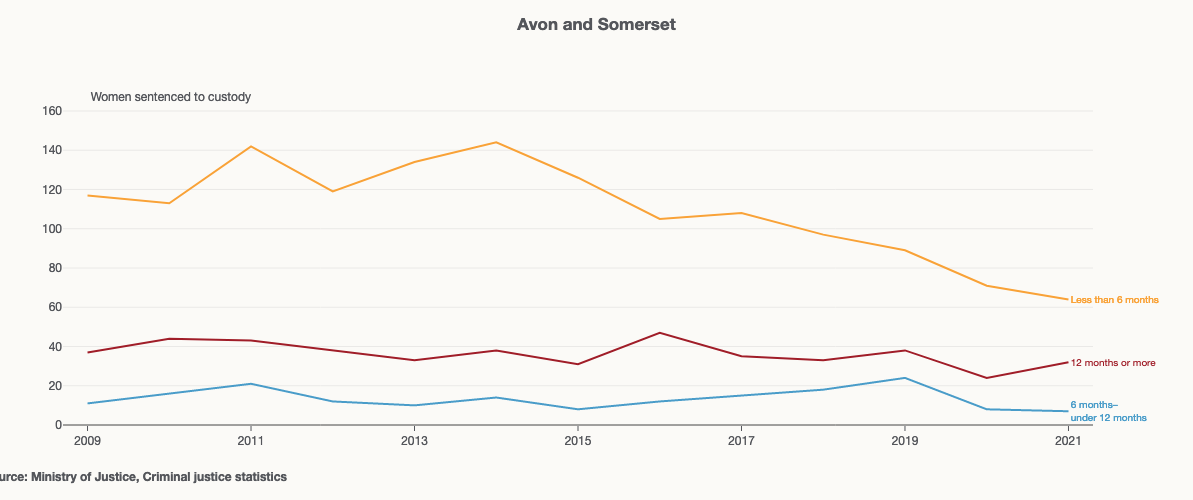

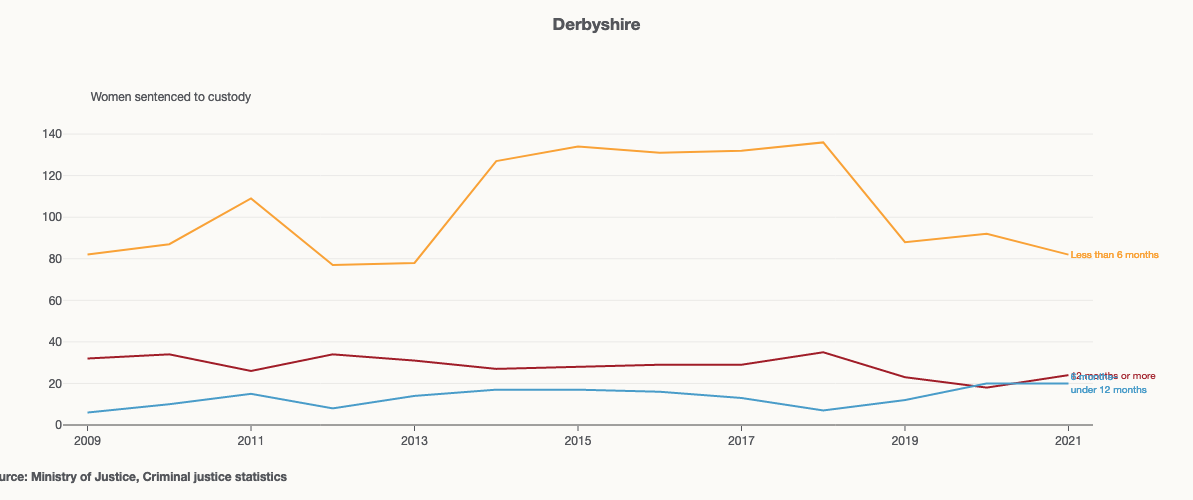

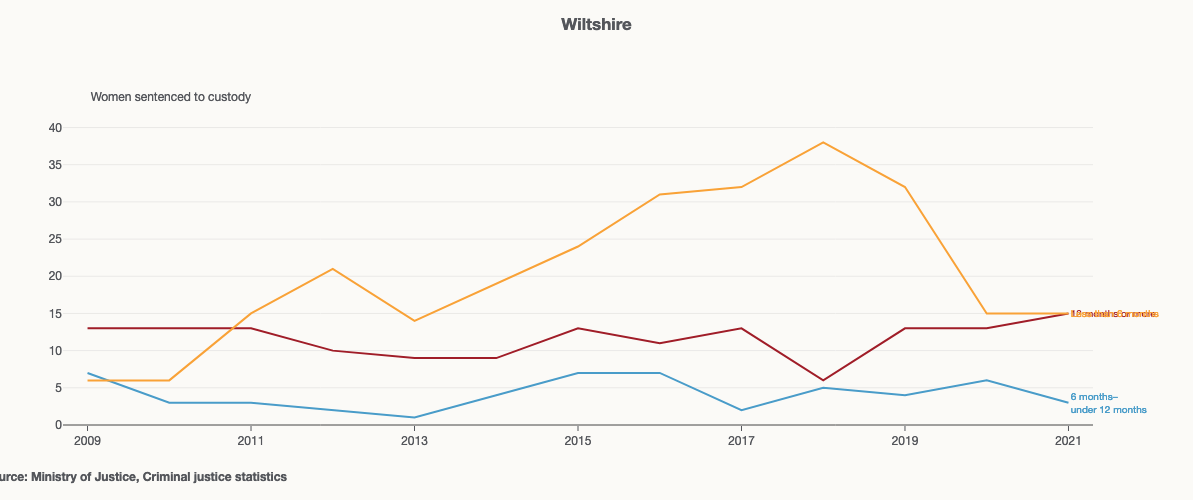

In [9]:
for pfa in df_filt['pfa'].unique():
    pfa_df = df_filt[df_filt["pfa"] == pfa]
    trace_list = [] # Need to empty my trace_list with every loop through each PFA so that charts are plotted separately
    fig = go.Figure() # Need to also instantiate the figure with every loop in order to clear fig.data values

    for i in pfa_df["sentence_len"].unique():  # Creating a for loop to extract unique values from the dataframe and make traces
        pfa_df_sentence = pfa_df[pfa_df["sentence_len"] == i]
        
        trace = go.Scatter(
            x=pfa_df_sentence["year"],
            y=pfa_df_sentence["freq"],
            mode="lines",
            name=str(pfa_df_sentence["sentence_len"].iloc[0]),
            meta=pfa_df_sentence["pfa"].iloc[0],   # Adding name of PFA in metadata to ensure data relates to only one area 
            hovertemplate="%{y}<extra></extra>"
        )

        trace_list.append(trace)

    fig.add_traces(trace_list)

    ## Chart title
    title = textwrap.wrap(f'<b>{pfa_df_sentence["pfa"].iloc[0]}</b>', width=100)

    fig.update_layout(
        margin=dict(l=63, b=75, r=100),
        title="<br>".join(title),
        title_y=0.94,
        title_yanchor="bottom",
        yaxis_title="",
        yaxis_tickformat=",.0f",
        yaxis_tick0=0,
        yaxis_nticks=10,        
        xaxis_dtick=2,
        xaxis_tick0=2009,    
        xaxis_showgrid=False,
        xaxis_tickcolor="#54565B",
        template=prt_template,
        showlegend=False,
        hovermode="x",
        modebar_activecolor="#A01D28",
        width=655,
        height=500,
    )

    ## Chart annotations
    annotations = []

    # Adding trace annotations
    for j in range(0, len(trace_list)):
        annotations.append(
            dict(
                xref="x",
                yref="y",
                x=fig.data[j].x[-1],
                y=fig.data[j].y[-1],
                text=str(fig.data[j].name),
                xanchor="left",
                align="left",
                showarrow=False,
                font_color=prt_template.layout.colorway[j],
                font_size=10,
            )
        )

    # Adding source label
    annotations.append(
        dict(
            xref="paper",
            yref="paper",
            x=-0.08,
            y=-0.19,
            align="left",
            showarrow=False,
            text="<b>Source: Ministry of Justice, Criminal justice statistics</b>",
            font_size=12,
        )
    )

    # Adding y-axis label
    annotations.append(
        dict(
            xref="x",
            yref="paper",
            x=df['year'].iloc[0],
            y=1.04,
            align="left",
            xanchor="left",
            showarrow=False,
            text="Women sentenced to custody",
            font_size=12,
        )
    )

    # Adding annotations to layout
    fig.update_layout(annotations=annotations)


    ## Setting chart axis ranges
    for i in range(len(fig.data)):
        max_trace = (fig.data[i].y).max()
    
    fig.update_yaxes(range=[0, max_trace + (max_trace * 0.15)])
    fig.update_xaxes(range=[2008.7, 2021.3])

    fig.show(config=config)

    ## Exporting to static image

    # Save results to ../reports/figures/custody_sentence_lengths, generate if does not exist.
    export_path = Path.joinpath(Path.cwd().parent, "reports", "figures", "custody_sentence_lengths")
    export_path.mkdir(parents=True, exist_ok=True)

    # Setting filename variable and full path

    filename = str(pfa_df_sentence["pfa"].iloc[0])
    export_svg_path = Path.joinpath(export_path, f'{filename}' + '.svg')

    # fig.write_image(export_svg_path)

Whilst the charts have been successfully output there are a couple of presentation issues:
* Overlapping annotations for the trace labels
* Inconsistent spacing of y-axis labels

### Stop trace labels from overlapping

Accessing the y values of the annotations

This shows the annotations of the last loop variable

In [10]:
annotations

[{'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 15,
  'text': '12 months or more',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#A01D28',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 3,
  'text': '6 months–<br>under 12 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#499CC9',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 15,
  'text': 'Less than 6 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#F9A237',
  'font_size': 10},
 {'xref': 'paper',
  'yref': 'paper',
  'x': -0.08,
  'y': -0.19,
  'align': 'left',
  'showarrow': False,
  'text': '<b>Source: Ministry of Justice, Criminal justice statistics</b>',
  'font_size': 12},
 {'xref': 'x',
  'yref': 'paper',
  'x': 2009,
  'y': 1.04,
  'align': 'left',
  'xanchor': 'left',
  'showarrow': False,
  'text': 'Women sentenced to custody',
  'font_size': 12}]

In [11]:
for i in range(len(annotations)):
    print(annotations[i]["y"])

15
3
15
-0.19
1.04


Checking max value for each trace

In [12]:
for i in range(len(fig.data)):
    print((fig.data[i].y).max())

15
7
38


How the loop should work:
* Check whether there are any duplicate y values in the annotation.
* If not then proceed as usual
* If there are then examine which of the two traces has the highest maximum value and apply a factor.

#### Check whether there are any duplicate y values in the annotation.

In [13]:
y_list = []
trace_max = []

def find_dups(list_to_check, item_to_find):
    for i in range(len(fig.data)):    
        j = annotations[i]["y"]
        y_list.append(j)

    #Returning a list of indexes with duplicate values
    return [idx for idx, value in enumerate(y_list) if value == j]
     
find_dups(y_list, j)

[0, 2]

In [14]:
annotations[1]

{'xref': 'x',
 'yref': 'y',
 'x': 2021,
 'y': 3,
 'text': '6 months–<br>under 12 months',
 'xanchor': 'left',
 'align': 'left',
 'showarrow': False,
 'font_color': '#499CC9',
 'font_size': 10}

In [10]:
y_list = []
trace_max = []

def find_dups(list_to_check, item_to_find):
    for i in range(len(fig.data)):    
        j = annotations[i]["y"]
        y_list.append(j)

    #Returning a list of indexes with duplicate values
    return [idx for idx, value in enumerate(y_list) if value == j]
     
find_dups(y_list, j)

[0, 2]

#### Examining which of the two traces has the highest maximum value and applying a factor

In [16]:
y_list = []
trace_max = []

def find_dups(list_to_check, item_to_find):
    #loop through each trace annotation to identify 
    for i in range(len(fig.data)):    
        j = annotations[i]["y"]
        y_list.append(j)
        trace_max.append((fig.data[i].y).max())
    print(f'''y_list: {y_list}
trace_max: {trace_max}''')

    duplicate_vals = [idx for idx, value in enumerate(y_list) if value == j]
    print(f'Duplicates: index {duplicate_vals}')
    max_i = 0

    for idx in duplicate_vals:
        if trace_max[idx] > max_i:
            max_i = idx
    print(f'Highest maximum: index {max_i}')

    y_list[max_i] = y_list[max_i] * 1.5
    print(f'New y_list: {y_list}\n')
    
find_dups(y_list, j)

y_list: [15, 3, 15]
trace_max: [15, 7, 38]
Duplicates: index [0, 2]
Highest maximum: index 2
New y_list: [15, 3, 22.5]



In [17]:
def find_dups():
    #loop through each trace annotation to identify 
    y_list = []
    trace_max = []
    for i in range(len(fig.data)):    
        j = annotations[i]["y"]
        y_list.append(j)
        trace_max.append((fig.data[i].y).max())
    print(f'''y_list: {y_list}
trace_max: {trace_max}''')

    duplicate_vals = [idx for idx, value in enumerate(y_list) if y_list.count(value) > 1]
    if len(duplicate_vals) > 0:
        print(f'Duplicates: index {duplicate_vals}')
        max_i = 0

        for idx in duplicate_vals:
            if trace_max[idx] > max_i:
                max_i = idx
        print(f'Highest maximum: index {max_i}')

        y_list[max_i] = y_list[max_i] * 1.5
        print(f'New y_list: {y_list}\n')

    
for pfa in df_filt['pfa'].unique():
    print(pfa)
    find_dups()

Avon and Somerset
y_list: [15, 3, 15]
trace_max: [15, 7, 38]
Duplicates: index [0, 2]
Highest maximum: index 2
New y_list: [15, 3, 22.5]

Derbyshire
y_list: [15, 3, 15]
trace_max: [15, 7, 38]
Duplicates: index [0, 2]
Highest maximum: index 2
New y_list: [15, 3, 22.5]

Wiltshire
y_list: [15, 3, 15]
trace_max: [15, 7, 38]
Duplicates: index [0, 2]
Highest maximum: index 2
New y_list: [15, 3, 22.5]



In [18]:
y_list

[15, 3, 22.5]

In [19]:
[idx for idx, value in enumerate(y_list) if y_list.count(value) > 1]

[]

#### Okay, that's worked in one instance to find duplicates and apply a factor to the one with the highest maximum value. Time to test on a loop.

In [20]:
for pfa in df_filt['pfa'].unique():
    pfa_df = df_filt[df_filt["pfa"] == pfa]
    trace_list = [] # Need to empty my trace_list with every loop through each PFA so that charts are plotted separately
    fig = go.Figure() # Need to also instantiate the figure with every loop in order to clear fig.data values

    for i in pfa_df["sentence_len"].unique():  # Creating a for loop to extract unique values from the dataframe and make traces
        pfa_df_sentence = pfa_df[pfa_df["sentence_len"] == i]
        
        trace = go.Scatter(
            x=pfa_df_sentence["year"],
            y=pfa_df_sentence["freq"],
            mode="lines",
            name=str(pfa_df_sentence["sentence_len"].iloc[0]),
            meta=pfa_df_sentence["pfa"].iloc[0],   # Adding name of PFA in metadata to ensure data relates to only one area 
            hovertemplate="%{y}<extra></extra>"
        )

        trace_list.append(trace)

    fig.add_traces(trace_list)


## Chart annotations
    annotations = []

    # Adding trace annotations
    for j in range(len(fig.data)):
        annotations.append(
            dict(
                xref="x",
                yref="y",
                x=fig.data[j].x[-1],
                y=fig.data[j].y[-1],
                text=str(fig.data[j].name),
                xanchor="left",
                align="left",
                showarrow=False,
                font_color=prt_template.layout.colorway[j],
                font_size=10,
            )
        )
        print(f'{annotations[j]["y"]}\n')
   
    # Checking for overlapping annotations
    find_dups()
    
    
    # Adding annotations to layout
    # fig.update_layout(annotations=annotations)
    
    # fig.show(config=config)
# print(annotations[j])

32

7

64

y_list: [32, 7, 64]
trace_max: [47, 24, 144]
24

20

82

y_list: [24, 20, 82]
trace_max: [35, 20, 136]
15

3

15

y_list: [15, 3, 15]
trace_max: [15, 7, 38]
Duplicates: index [0, 2]
Highest maximum: index 2
New y_list: [15, 3, 22.5]



#### The logic is working here, but rather than applying the new value to y_list we need up update the value in the annotations list.

In [21]:
def find_dups():
    #loop through each trace annotation to identify 
    y_list = []
    trace_max = []
    for i in range(len(fig.data)):    
        j = annotations[i]["y"]
        y_list.append(j)
        trace_max.append((fig.data[i].y).max())
    print(f'''y_list: {y_list}
trace_max: {trace_max}''')

    duplicate_vals = [idx for idx, value in enumerate(y_list) if y_list.count(value) > 1]
    if len(duplicate_vals) > 0:
        print(f'Duplicates found: index {duplicate_vals}')
        max_i = 0

        for idx in duplicate_vals:
            if trace_max[idx] > max_i:
                max_i = idx
        print(f'Highest maximum: index {max_i}')

        annotations[max_i]['y'] = annotations[max_i]['y'] * 1.2
        # y_list[max_i] = y_list[max_i] * 1.5
        # print(f'New y_list: {y_list}\n')
        print(f'New annotation values: {[annotations[i]["y"] for i in range(len(annotations))]}\n')
    
    else:
        print("No duplicates found!\n")
    
    return y_list

find_dups()

y_list: [15, 3, 15]
trace_max: [15, 7, 38]
Duplicates found: index [0, 2]
Highest maximum: index 2
New annotation values: [15, 3, 18.0]



[15, 3, 15]

#### After some testing this is a working (albeit still in progress) function

In [22]:
annotations

[{'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 15,
  'text': '12 months or more',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#A01D28',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 3,
  'text': '6 months–<br>under 12 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#499CC9',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 18.0,
  'text': 'Less than 6 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#F9A237',
  'font_size': 10}]

#### Quick resetting of duplicate value for testing purposes

In [23]:
annotations[2]['y'] = 15
annotations[2]['y']

15

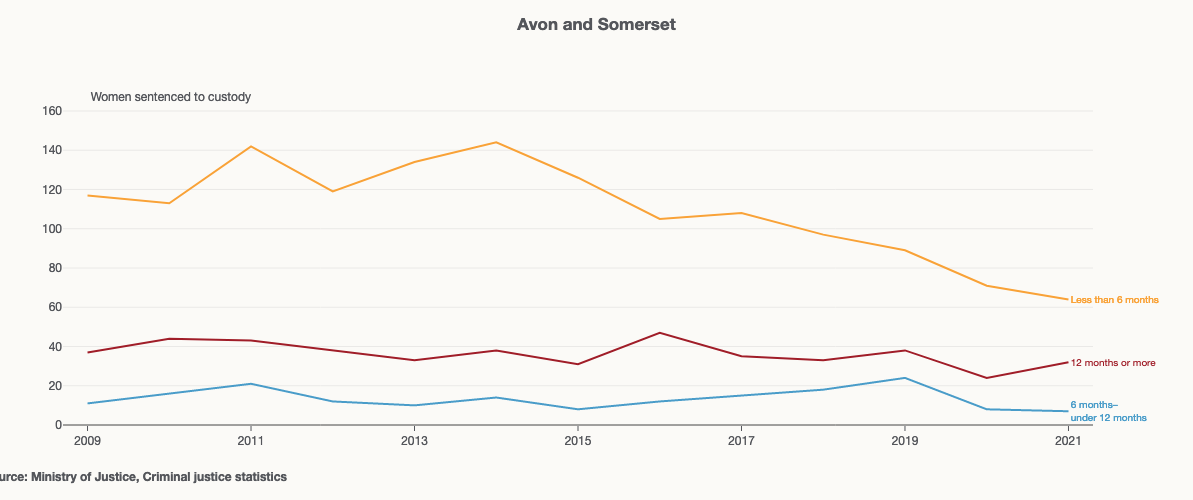

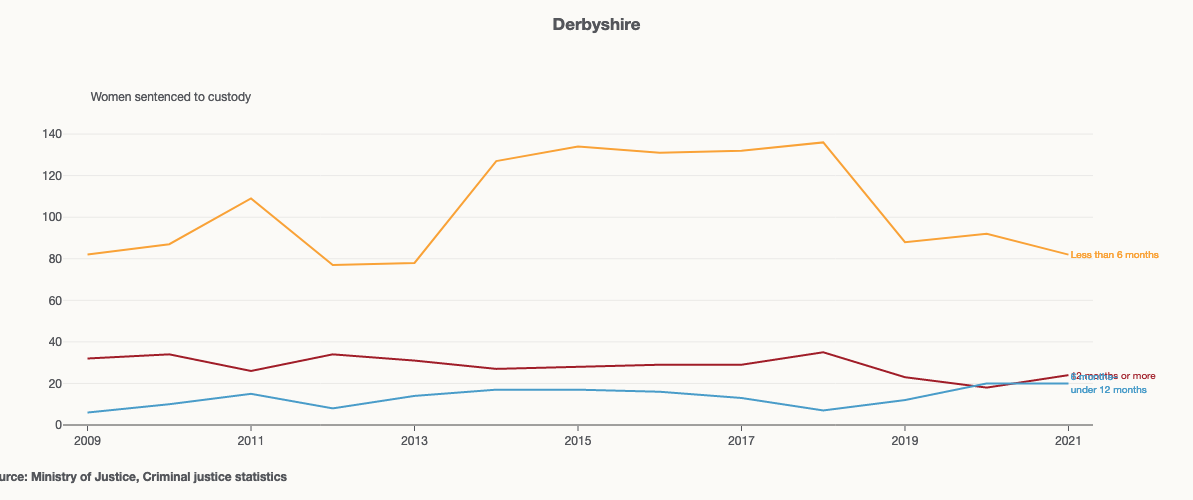

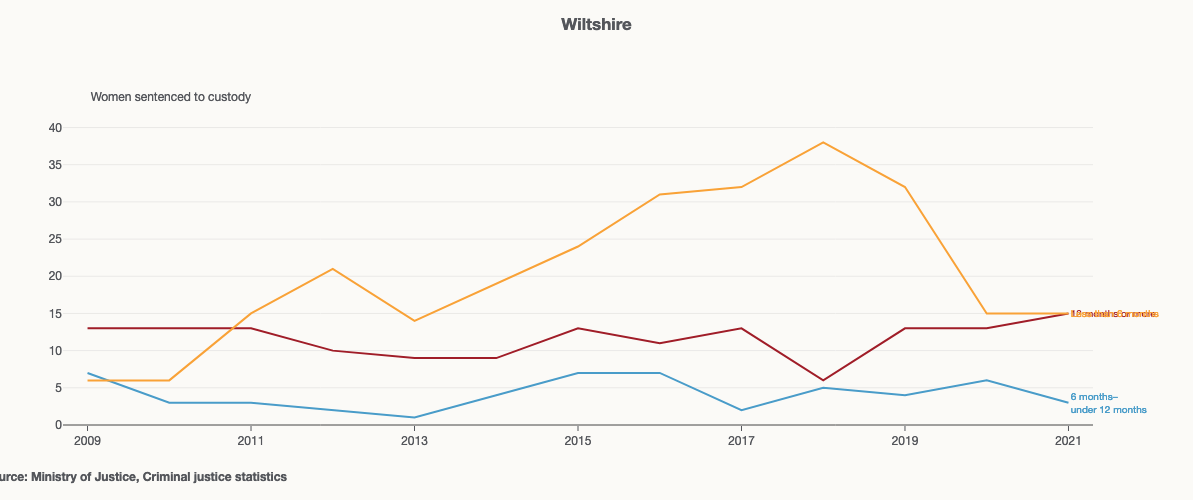

In [226]:
for pfa in df_filt['pfa'].unique():
    pfa_df = df_filt[df_filt["pfa"] == pfa]
    trace_list = [] # Need to empty my trace_list with every loop through each PFA so that charts are plotted separately
    fig = go.Figure() # Need to also instantiate the figure with every loop in order to clear fig.data values

    for i in pfa_df["sentence_len"].unique():  # Creating a for loop to extract unique values from the dataframe and make traces
        pfa_df_sentence = pfa_df[pfa_df["sentence_len"] == i]
        
        trace = go.Scatter(
            x=pfa_df_sentence["year"],
            y=pfa_df_sentence["freq"],
            mode="lines",
            name=str(pfa_df_sentence["sentence_len"].iloc[0]),
            meta=pfa_df_sentence["pfa"].iloc[0],   # Adding name of PFA in metadata to ensure data relates to only one area 
            hovertemplate="%{y}<extra></extra>"
        )

        trace_list.append(trace)

    fig.add_traces(trace_list)

    ## Chart title
    title = textwrap.wrap(f'<b>{pfa_df_sentence["pfa"].iloc[0]}</b>', width=100)

    fig.update_layout(
        margin=dict(l=63, b=75, r=100),
        title="<br>".join(title),
        title_y=0.94,
        title_yanchor="bottom",
        yaxis_title="",
        yaxis_tickformat=",.0f",
        yaxis_tick0=0,
        yaxis_nticks=10,        
        xaxis_dtick=2,
        xaxis_tick0=2009,    
        xaxis_showgrid=False,
        xaxis_tickcolor="#54565B",
        template=prt_template,
        showlegend=False,
        hovermode="x",
        modebar_activecolor="#A01D28",
        width=655,
        height=500,
    )

    ## Chart annotations
    annotations = []

    # Adding trace annotations
    for j in range(0, len(trace_list)):
        annotations.append(
            dict(
                xref="x",
                yref="y",
                x=fig.data[j].x[-1],
                y=fig.data[j].y[-1],
                text=str(fig.data[j].name),
                xanchor="left",
                align="left",
                showarrow=False,
                font_color=prt_template.layout.colorway[j],
                font_size=10,
            )
        )

    # Adding source label
    annotations.append(
        dict(
            xref="paper",
            yref="paper",
            x=-0.08,
            y=-0.19,
            align="left",
            showarrow=False,
            text="<b>Source: Ministry of Justice, Criminal justice statistics</b>",
            font_size=12,
        )
    )

    # Adding y-axis label
    annotations.append(
        dict(
            xref="x",
            yref="paper",
            x=df['year'].iloc[0],
            y=1.04,
            align="left",
            xanchor="left",
            showarrow=False,
            text="Women sentenced to custody",
            font_size=12,
        )
    )
    
    # Checking for overlapping annotations on trace labels
#     find_dups()
    
    # Adding annotations to layout
    fig.update_layout(annotations=annotations)

    ## Setting chart axis ranges
    for i in range(len(fig.data)):
        max_trace = (fig.data[i].y).max()
    
    fig.update_yaxes(range=[0, max_trace + (max_trace * 0.15)])
    fig.update_xaxes(range=[2008.7, 2021.3])

    fig.show(config=config)

    ## Exporting to static image

    # Save results to ../reports/figures/custody_sentence_lengths, generate if does not exist.
    export_path = Path.joinpath(Path.cwd().parent, "reports", "figures", "custody_sentence_lengths")
    export_path.mkdir(parents=True, exist_ok=True)

    # Setting filename variable and full path

    filename = str(pfa_df_sentence["pfa"].iloc[0])
    export_svg_path = Path.joinpath(export_path, f'{filename}' + '.svg')

    # fig.write_image(export_svg_path)

In [192]:
annotations

[{'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 15,
  'text': '12 months or more',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#A01D28',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 3,
  'text': '6 months–<br>under 12 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#499CC9',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 15,
  'text': 'Less than 6 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#F9A237',
  'font_size': 10},
 {'xref': 'paper',
  'yref': 'paper',
  'x': -0.08,
  'y': -0.19,
  'align': 'left',
  'showarrow': False,
  'text': '<b>Source: Ministry of Justice, Criminal justice statistics</b>',
  'font_size': 12},
 {'xref': 'x',
  'yref': 'paper',
  'x': 2009,
  'y': 1.04,
  'align': 'left',
  'xanchor': 'left',
  'showarrow': False,
  'text': 'Women sentenced to custody',
  'font_size': 12}]

#### Success, it's moved the label on the chart with a duplicate y-value. There's still the small issue of the second chart having overlapping traces because the y values are close together, but this is a breakthrough.

Now to work on those with overlapping, rather than identical values.

### TRYING TO GET THE FIND_DUPS AND OVERLAPS FUNCTIONS TO INTERACT

In [26]:
y_list = [20, 10, 5]
trace_max = [50, 30, 15]

In [27]:
overlap_vals = [idx-1 for idx, value in enumerate(y_list) if abs(y_list[idx - 1] - y_list[idx]) < 7]
overlap_vals

[1]

In [28]:
[y_list[i] for i in overlap_vals]

[10]

In [29]:
y_list = [20, 10, 5]

In [30]:
def overlaps(y_list):
    print(f'Old y_list: {y_list}')
    overlap_vals = [idx-1 for idx, value in enumerate(y_list) if abs(y_list[idx - 1] - y_list[idx]) < 7]
    for i in overlap_vals:
        difference = abs(y_list[i] - y_list[i+1])
        y_list[i] += 7 - difference
        annotations[i]['y'] = y_list[i]
        print(f'Updating annotation location on index {i} to new value {annotations[i]["y"]}')
        print(f'New y_list: {y_list}')

In [31]:
overlaps(y_list)

Old y_list: [20, 10, 5]
Updating annotation location on index 1 to new value 12
New y_list: [20, 12, 5]


In [32]:
y_list

[20, 12, 5]

### Checking for duplicate and overlapping annotation labels: Step by step

I require a number of functions to complete the following actions:
1. Loop through each y value of my annotations
1. Check whether any y values are identical
    1. Yes: Identify the indexes of those identical values and which has the highest maximum value across its trace and increase its y value by a factor.
    2. No: Continue
1. Check whether any y values are in close proximity to each other and might overlap each other
    1. Yes: Update y value to ensure a minimum gap between annotations
    1. No: Continue
1. Append values to annotations




In [12]:
def annotation_yvals():
    y_list = [fig.data[i]['y'][-1] for i in range(len(fig.data))] #selecting last y value for each trace 
    return y_list

In [13]:
# Instantiating function to y_vals
y_vals = annotation_yvals()
y_vals

[15, 3, 15]

In [14]:
def trace_max():
    trace_max_list = [(fig.data[i]['y']).max() for i in range(len(fig.data))] #Selecting maximum value from each trace
    return trace_max_list

In [15]:
# Instantiating function to max_val
max_val = trace_max()
max_val

[15, 7, 38]

In [16]:
def check_duplicates(y_vals, trace_max):
    duplicate_vals = [idx for idx, value in enumerate(y_vals) if y_vals.count(value) > 1]
    if len(duplicate_vals) > 0:
        print(f'Duplicates found: index {duplicate_vals}\nUpdating...')
        
        max_i = 0
        for idx in duplicate_vals:
            if trace_max[idx] > max_i:
                max_i = idx
        y_vals[max_i] = y_vals[max_i] * 1.2
        annotations[max_i]['y'] = y_vals[max_i]
                     
    else:
        print("No duplicates found!\n")

In [18]:
check_duplicates(y_vals, max_val)

Duplicates found: index [0, 2]
Updating...


In [19]:
annotations

[{'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 15,
  'text': '12 months or more',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#A01D28',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 3,
  'text': '6 months–<br>under 12 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#499CC9',
  'font_size': 10},
 {'xref': 'x',
  'yref': 'y',
  'x': 2021,
  'y': 18.0,
  'text': 'Less than 6 months',
  'xanchor': 'left',
  'align': 'left',
  'showarrow': False,
  'font_color': '#F9A237',
  'font_size': 10},
 {'xref': 'paper',
  'yref': 'paper',
  'x': -0.08,
  'y': -0.19,
  'align': 'left',
  'showarrow': False,
  'text': '<b>Source: Ministry of Justice, Criminal justice statistics</b>',
  'font_size': 12},
 {'xref': 'x',
  'yref': 'paper',
  'x': 2009,
  'y': 1.04,
  'align': 'left',
  'xanchor': 'left',
  'showarrow': False,
  'text': 'Women sentenced to custody',
  'font_size': 12}]

In [45]:
def overlaps_idx(y_list):
    print(f'Old y_list: {y_list}')
    overlap_vals = [idx-1 for idx, value in enumerate(y_list) if abs(y_list[idx - 1] - y_list[idx]) < 10]
    return overlap_vals

In [ ]:
def update_overlaps(overlap_vals):
    for i in overlap_vals:
            difference = abs(y_list[i] - y_list[i+1])
            y_list[i] += 10 - difference
            # annotations[i]['y'] = y_list[i]
            print(f'Updating annotation location on index {i} to new value {annotations[i]["y"]}')
            print(f'New y_list: {y_list}')
            return y_list

In [30]:
check_overlaps(y_vals)

Old y_list: [15, 3, 25.0]


#### Continuing development for check_overlaps function

In [17]:
y_list = [16, 29, 10]

In [11]:
for i in range(len(y_list)):
    print(f'Iteration {i}')
    for j in range(len(y_list)):
        if j != i:
            print(j)

Iteration 0
1
2
Iteration 1
0
2
Iteration 2
0
1


In [12]:
for i in range(len(y_list)):
    print(f'Iteration {i}')
    for idx, value in enumerate(y_list):
        if idx != i:
            print(f'Comparing {y_list[idx]} with {y_list[i]}')

Iteration 0
Comparing 29 with 16
Comparing 10 with 16
Iteration 1
Comparing 16 with 29
Comparing 10 with 29
Iteration 2
Comparing 16 with 10
Comparing 29 with 10


In [142]:
for i in range(len(y_list)):
    print(f'Iteration {i}')
    print(f'Old y_list: {y_list}')
    for idx, value in enumerate(y_list):
        difference = abs(value - y_list[i])
        if value != y_list[i]:
            print(f'Comparing {y_list[idx]} with {y_list[i]}')
            print(f'Difference of {difference}')
            if difference < 10:
                print(f'Updating {y_list[idx]}\n')
                y_list[idx] += 10 - difference
        else:
            continue
        print()
    print(f'New list{y_list}\n')

Iteration 0
Old y_list: [16, 29, 10]
Comparing 29 with 16
Difference of 13

Comparing 10 with 16
Difference of 6
Updating 10


New list[16, 29, 14]

Iteration 1
Old y_list: [16, 29, 14]
Comparing 16 with 29
Difference of 13

Comparing 14 with 29
Difference of 15

New list[16, 29, 14]

Iteration 2
Old y_list: [16, 29, 14]
Comparing 16 with 14
Difference of 2
Updating 16


Comparing 29 with 14
Difference of 15

New list[24, 29, 14]



In [ ]:
def overlaps_idx(y_list):
    print(f'Old y_list: {y_list}')
    for i in range(len(y_list)):
        for idx, value in enumerate(y_list):
            if idx != i:
                print(y_list[idx])
    overlap_vals = [idx for idx, value in enumerate(y_list) if abs(y_list[idx - 1] - y_list[idx]) < 10]
    return overlap_vals

In [96]:
def check_overlaps(y_list):
    print(f'Old y_list: {y_list}')
    overlap_vals = [idx for idx, value in enumerate(y_list) if abs(y_list[] - y_list[idx]) < 10]
    for i in overlap_vals:
        difference = abs(y_list[0] - y_list[i])
        y_list[i] += 10 - difference
        # annotations[i]['y'] = y_list[i]
        print(f'Updating annotation location on index {i} to new value {y_list[i]}')
        print(f'New y_list: {y_list}')
        return y_list

In [117]:
overlap_vals = [idx for idx, value in enumerate(y_list) if abs(y_list[0] - y_list[idx]) < 10]
overlap_vals

[0, 1, 2]

### Right, after some Stack Overflow assistance I've got a much more elegant solution using `itertools.pairwise`

In [17]:
import itertools

In [18]:
def check(l, space):
    return all(x2-x1 >= space for x1,x2 in itertools.pairwise(sorted(l)))

In [13]:
check(y_list)

False

In [88]:
def adjust_OG(l, space):
    for (idx1,num1), (idx2,num2) in itertools.pairwise(sorted(enumerate(l), key=lambda tup: tup[1])):
        if l[idx2] < l[idx1]+space: # Note: Don't be tempted to use num1 or num2 here
            l[idx2] = l[idx1]+space
            annotations[idx2]['y'] = l[idx2]

In [238]:
l = [16, 29, 10]
%timeit adjust(l, 10)
l

833 ns ± 17.5 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


[20, 30, 10]

In [228]:
def adjust_update_testing(l, space):
    for (idx1,num1), (idx2,num2) in itertools.permutations(enumerate(l), 2):
        difference = abs(l[idx1] - l[idx2])
        print(f'Checking {l[idx1]} against {l[idx2]}')
        if difference < space:
            largest = max((idx1,num1), (idx2,num2), key=lambda x:x[1])
            largest_index = largest[0]
            print(f'Difference of {difference} is too small')
            print(f'I need to update {largest}')
            l[largest_index] = l[largest_index] + (space - difference)
            print(f'Updated to {l[largest_index]}')
            annotations[largest_index]['y'] = l[largest_index]

Final working `adust` function

In [19]:
def adjust(l, space):
    for (idx1,num1), (idx2,num2) in itertools.permutations(enumerate(l), 2):
        difference = abs(l[idx1] - l[idx2])
        if difference < space:
            largest = max((idx1,num1), (idx2,num2), key=lambda x:x[1])
            largest_index = largest[0]
            l[largest_index] = l[largest_index] + (space - difference)
            annotations[largest_index]['y'] = l[largest_index]

In [239]:
l = [16, 29, 10]
%timeit adjust(l, 10)
l

912 ns ± 32.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


[20, 30, 10]

## Final working functions

In [17]:
import itertools

In [12]:
def annotation_yvals():
    y_list = [fig.data[i]['y'][-1] for i in range(len(fig.data))] #selecting last y value for each trace 
    return y_list

In [14]:
def trace_max():
    trace_max_list = [(fig.data[i]['y']).max() for i in range(len(fig.data))] #Selecting maximum value from each trace
    return trace_max_list

In [25]:
def check_duplicates(y_vals, trace_max):
    duplicate_vals = [idx for idx, value in enumerate(y_vals) if y_vals.count(value) > 1]
    if len(duplicate_vals) > 0:
        print(f'Duplicates found: index {duplicate_vals}\nUpdating...')
        
        max_i = 0
        for idx in duplicate_vals:
            if trace_max[idx] > max_i:
                max_i = idx
        y_vals[max_i] = y_vals[max_i] * 1.2
        annotations[max_i]['y'] = y_vals[max_i]

In [21]:
def check_overlap(l, space):
    return all(x2-x1 >= space for x1,x2 in itertools.pairwise(sorted(l)))

In [22]:
def adjust_overlap(l, space):
    for (idx1,num1), (idx2,num2) in itertools.permutations(enumerate(l), 2):
        difference = abs(l[idx1] - l[idx2])
        if difference < space:
            largest = max((idx1,num1), (idx2,num2), key=lambda x:x[1])
            largest_index = largest[0]
            l[largest_index] = l[largest_index] + (space - difference)
            annotations[largest_index]['y'] = l[largest_index]

#### Right, this function now seems to be working on this test value. Let's add it to the small loop.

No duplicates found!



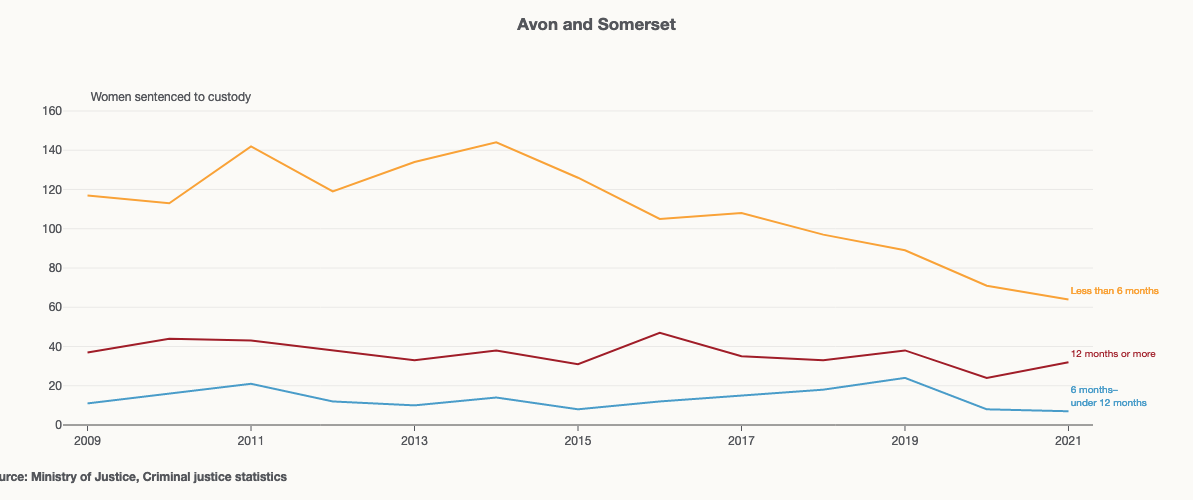

No duplicates found!



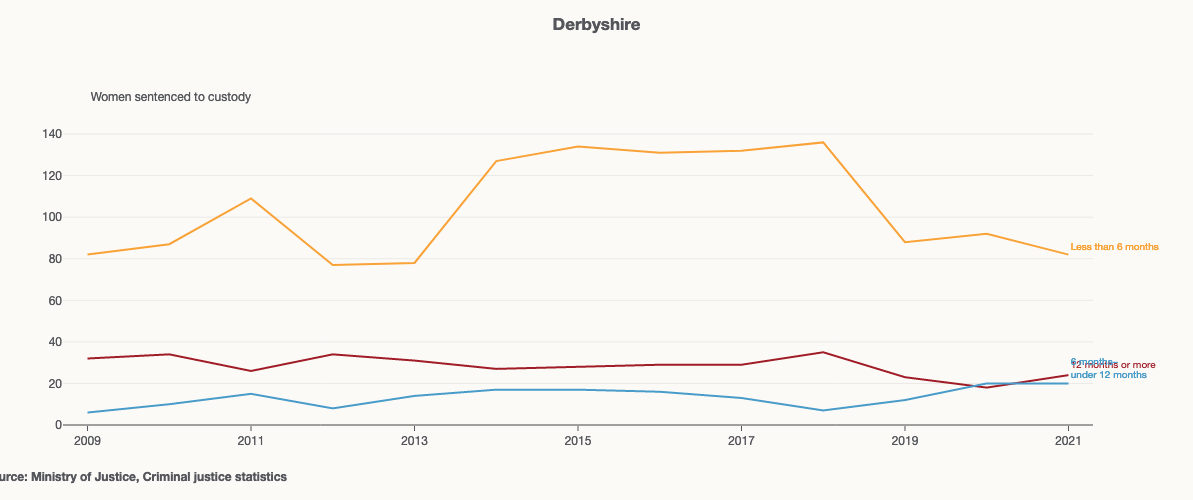

Duplicates found: index [0, 2]
Updating...


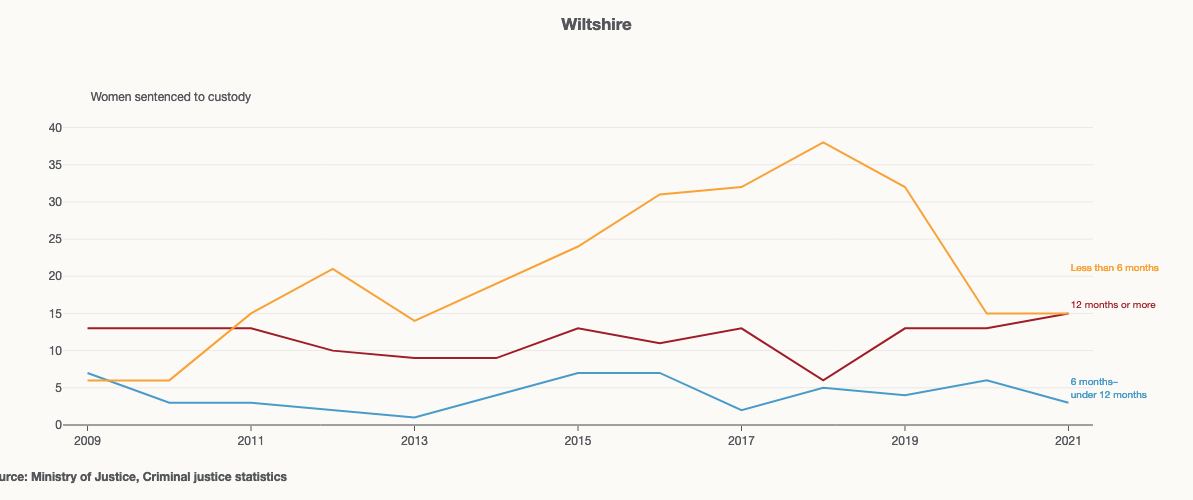

In [23]:
for pfa in df_filt['pfa'].unique():
    pfa_df = df_filt[df_filt["pfa"] == pfa]
    trace_list = [] # Need to empty my trace_list with every loop through each PFA so that charts are plotted separately
    fig = go.Figure() # Need to also instantiate the figure with every loop in order to clear fig.data values

    for i in pfa_df["sentence_len"].unique():  # Creating a for loop to extract unique values from the dataframe and make traces
        pfa_df_sentence = pfa_df[pfa_df["sentence_len"] == i]
        
        trace = go.Scatter(
            x=pfa_df_sentence["year"],
            y=pfa_df_sentence["freq"],
            mode="lines",
            name=str(pfa_df_sentence["sentence_len"].iloc[0]),
            meta=pfa_df_sentence["pfa"].iloc[0],   # Adding name of PFA in metadata to ensure data relates to only one area 
            hovertemplate="%{y}<extra></extra>"
        )

        trace_list.append(trace)

    fig.add_traces(trace_list)

    ## Chart title
    title = textwrap.wrap(f'<b>{pfa_df_sentence["pfa"].iloc[0]}</b>', width=100)

    fig.update_layout(
        margin=dict(l=63, b=75, r=100),
        title="<br>".join(title),
        title_y=0.94,
        title_yanchor="bottom",
        yaxis_title="",
        yaxis_tickformat=",.0f",
        yaxis_tick0=0,
        yaxis_nticks=10,        
        xaxis_dtick=2,
        xaxis_tick0=2009,    
        xaxis_showgrid=False,
        xaxis_tickcolor="#54565B",
        template=prt_template,
        showlegend=False,
        hovermode="x",
        modebar_activecolor="#A01D28",
        width=655,
        height=500,
    )

    ## Chart annotations
    annotations = []

    # Adding trace annotations
    for j in range(0, len(trace_list)):
        annotations.append(
            dict(
                xref="x",
                yref="y",
                x=fig.data[j].x[-1],
                y=fig.data[j].y[-1],
                text=str(fig.data[j].name),
                xanchor="left",
                yanchor="bottom",
                align="left",
                showarrow=False,
                font_color=prt_template.layout.colorway[j],
                font_size=10,
            )
        )

    # Adding source label
    annotations.append(
        dict(
            xref="paper",
            yref="paper",
            x=-0.08,
            y=-0.19,
            align="left",
            showarrow=False,
            text="<b>Source: Ministry of Justice, Criminal justice statistics</b>",
            font_size=12,
        )
    )

    # Adding y-axis label
    annotations.append(
        dict(
            xref="x",
            yref="paper",
            x=df['year'].iloc[0],
            y=1.04,
            align="left",
            xanchor="left",
            showarrow=False,
            text="Women sentenced to custody",
            font_size=12,
        )
    )
    
    # Checking for duplicate annotations on trace labels
    y_vals = annotation_yvals()
    max_val = trace_max()
    check_duplicates(y_vals, max_val)
    
    space = 5
    if check_overlap(y_vals, space) == False:
        adjust_overlap(y_vals, space)
    
    # Adding annotations to layout
    fig.update_layout(annotations=annotations)

    ## Setting chart axis ranges
    for i in range(len(fig.data)):
        max_trace = (fig.data[i].y).max()
    
    fig.update_yaxes(range=[0, max_trace + (max_trace * 0.15)])
    fig.update_xaxes(range=[2008.7, 2021.3])

    fig.show(config=config)

    ## Exporting to static image

    # Save results to ../reports/figures/custody_sentence_lengths, generate if does not exist.
    export_path = Path.joinpath(Path.cwd().parent, "reports", "figures", "custody_sentence_lengths")
    export_path.mkdir(parents=True, exist_ok=True)

    # Setting filename variable and full path

    filename = str(pfa_df_sentence["pfa"].iloc[0])
    export_svg_path = Path.joinpath(export_path, f'{filename}' + '.svg')

    # fig.write_image(export_svg_path)

### Working full loop for all PFAs

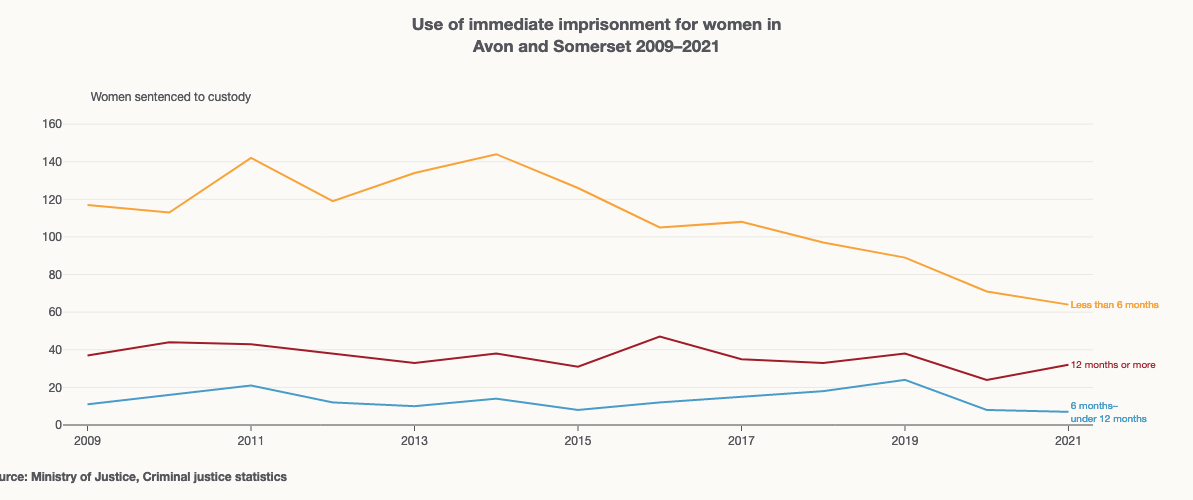

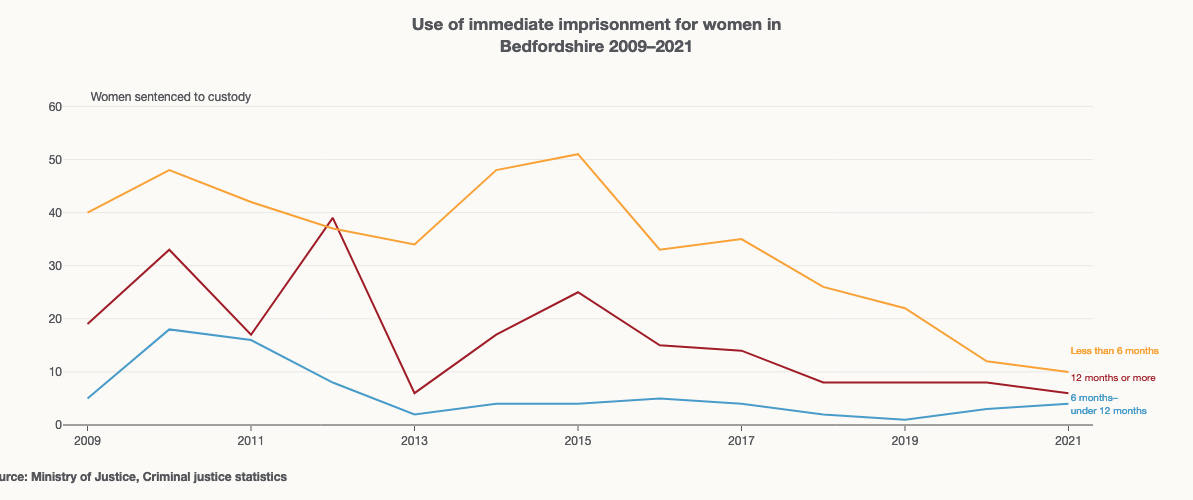

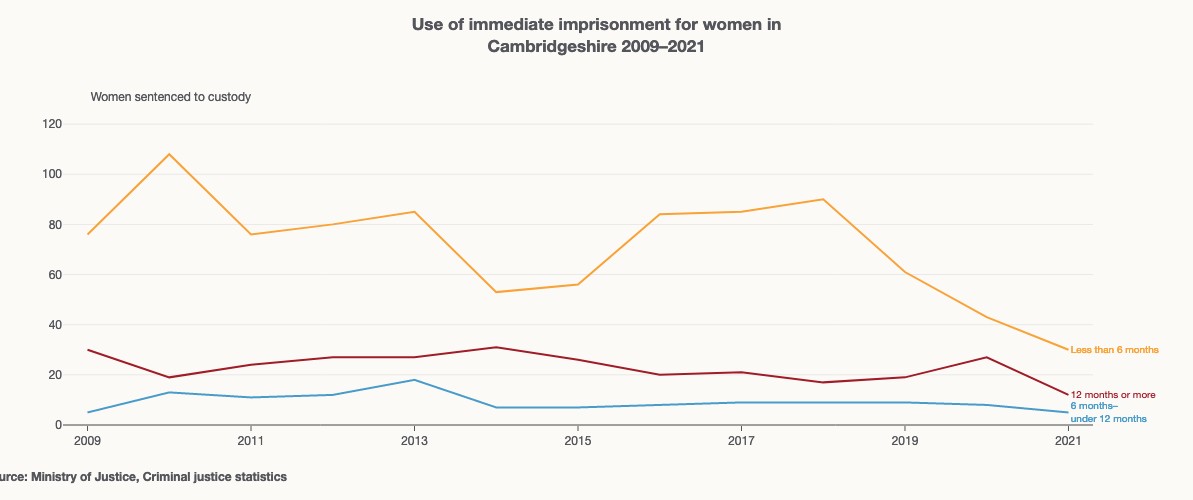

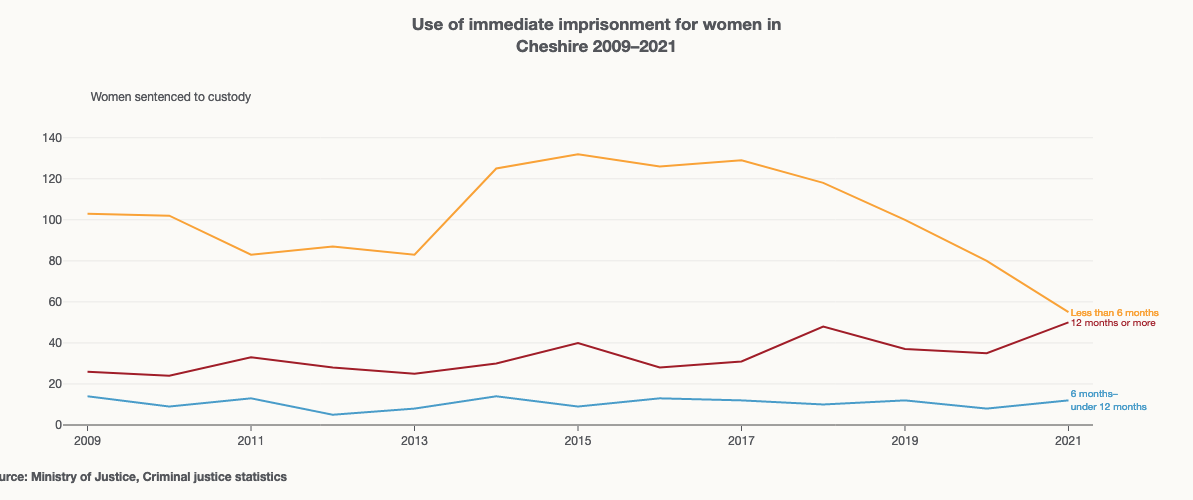

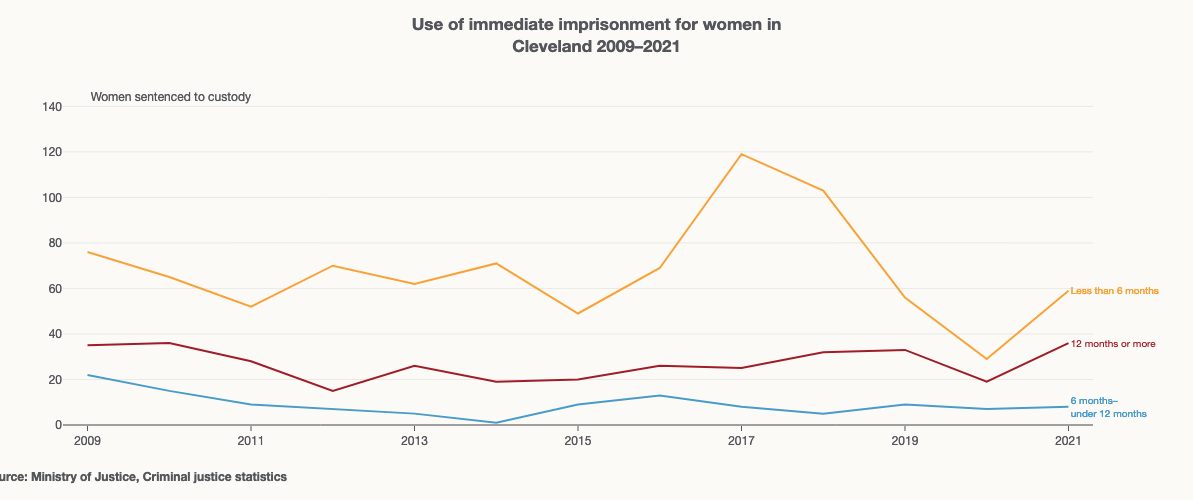

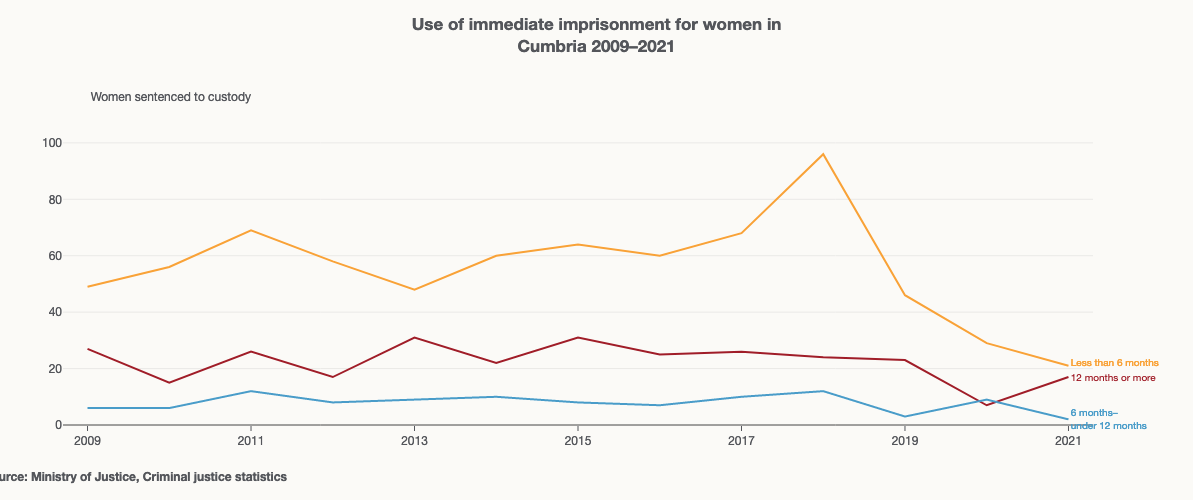

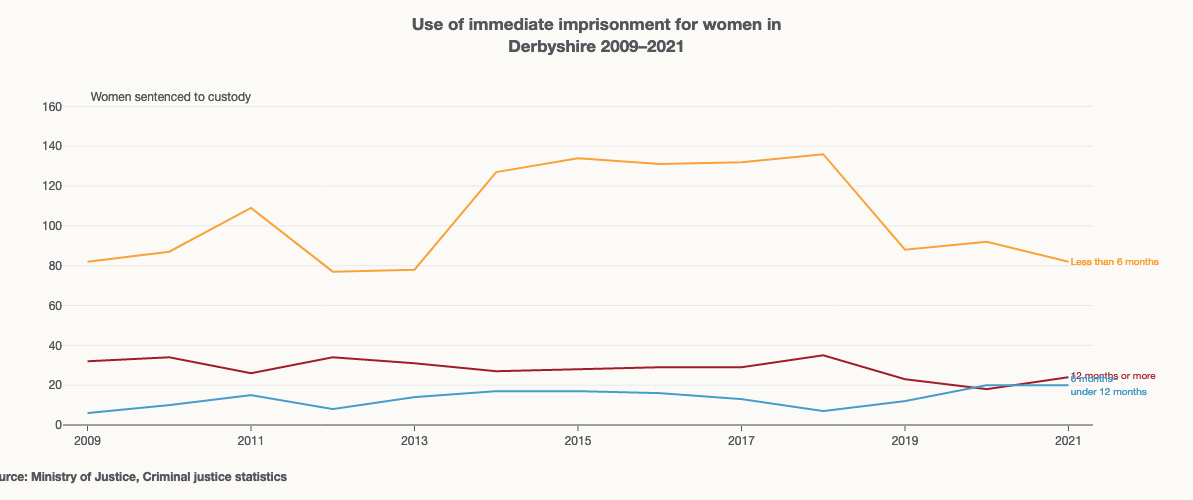

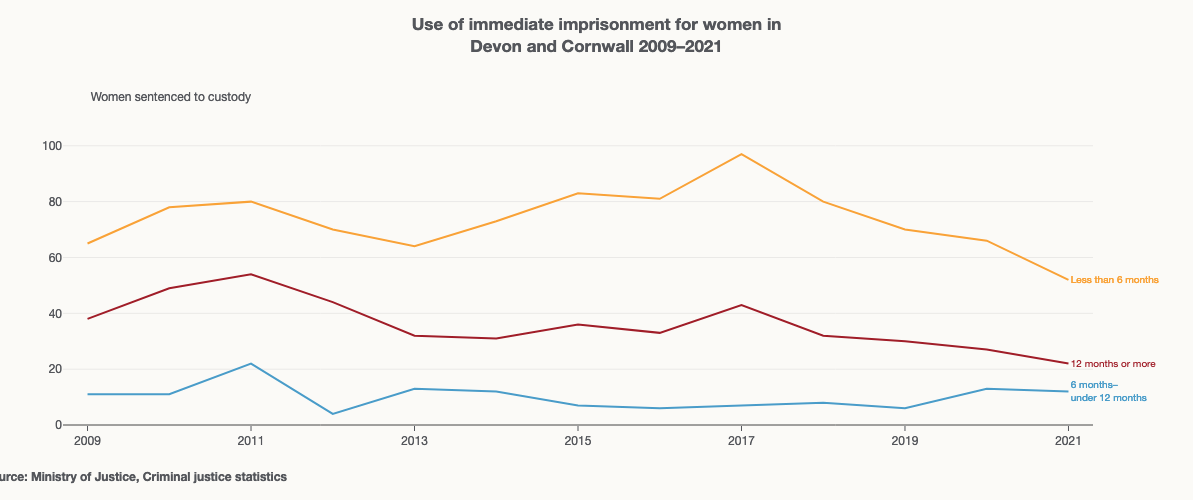

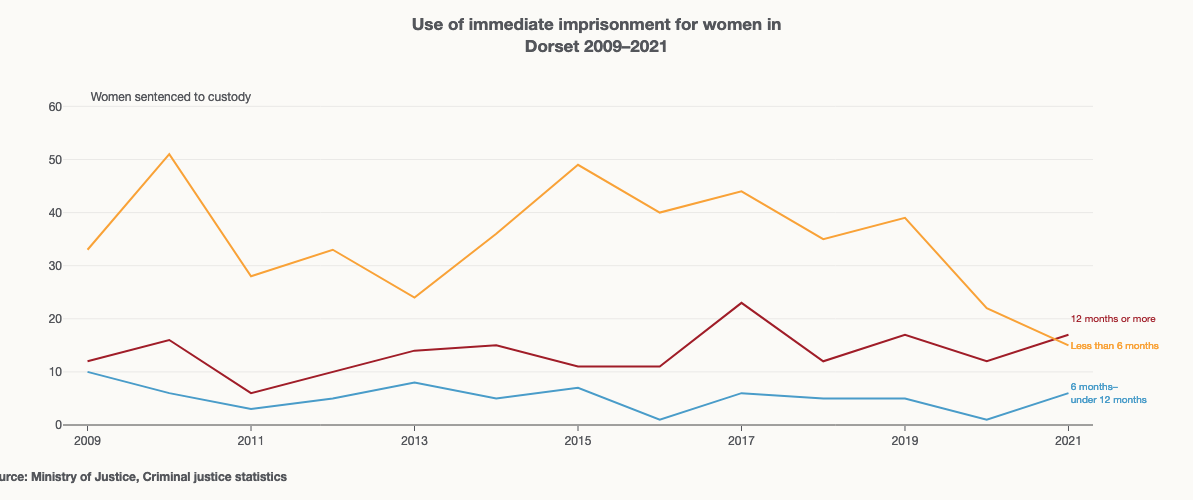

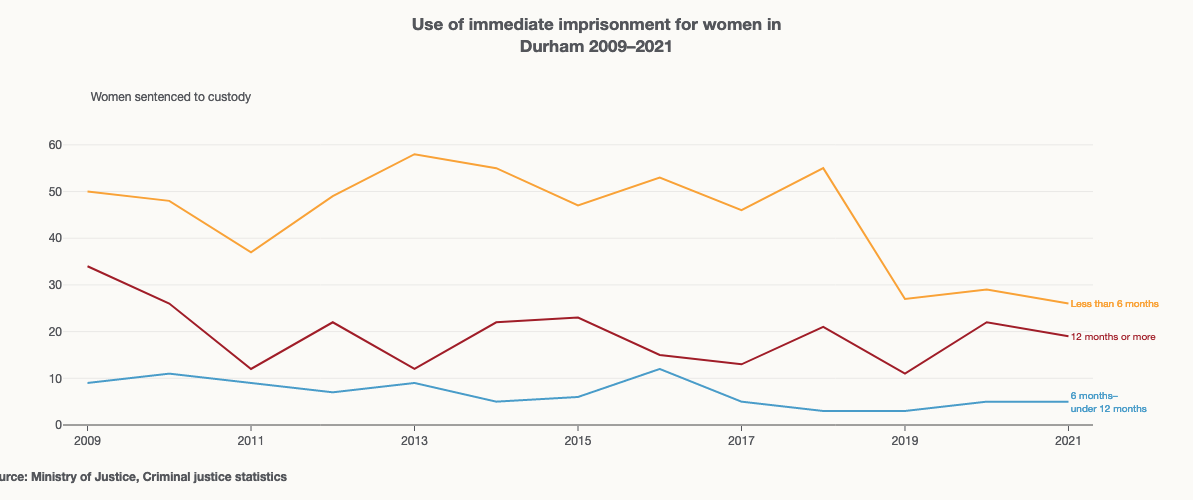

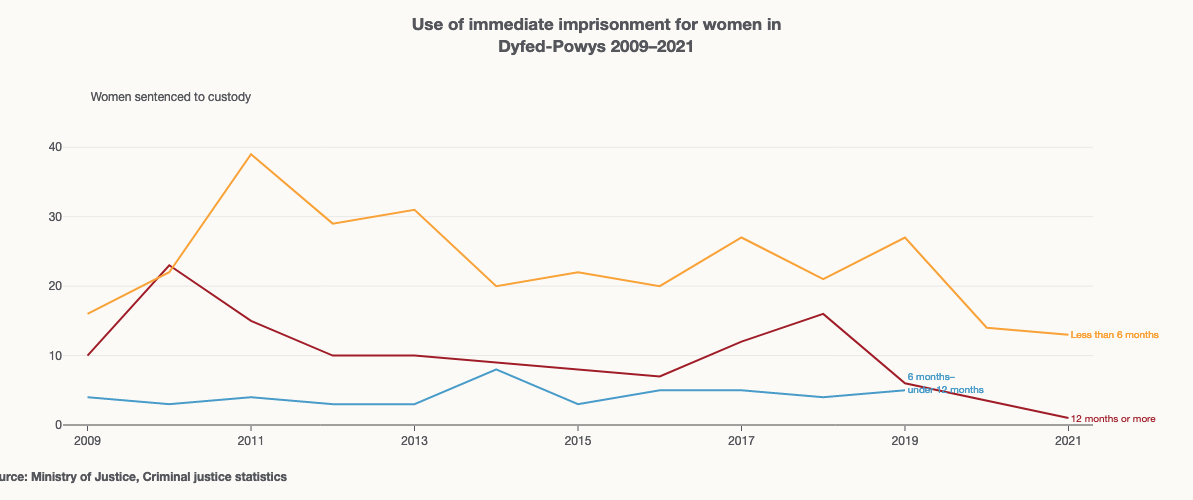

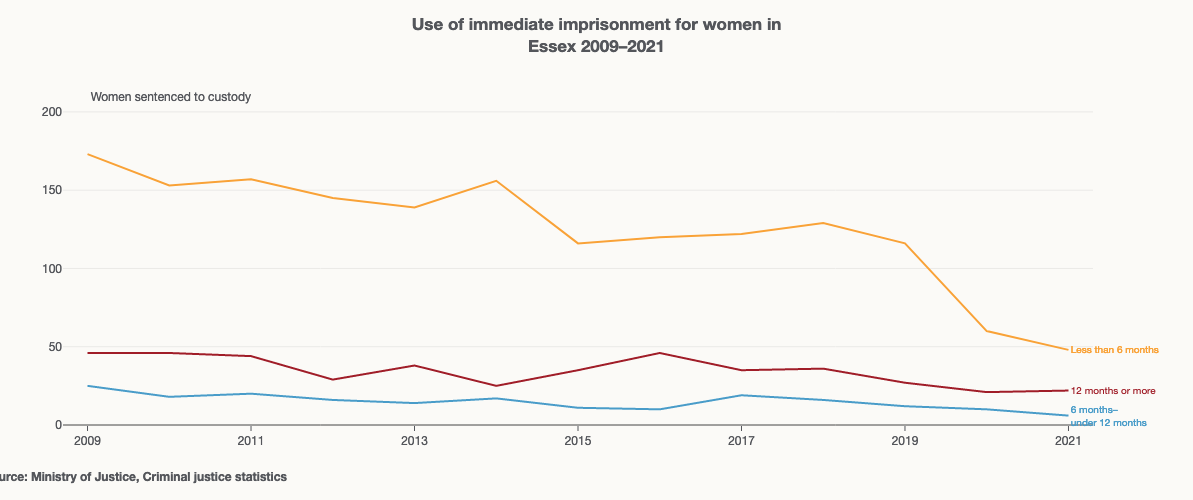

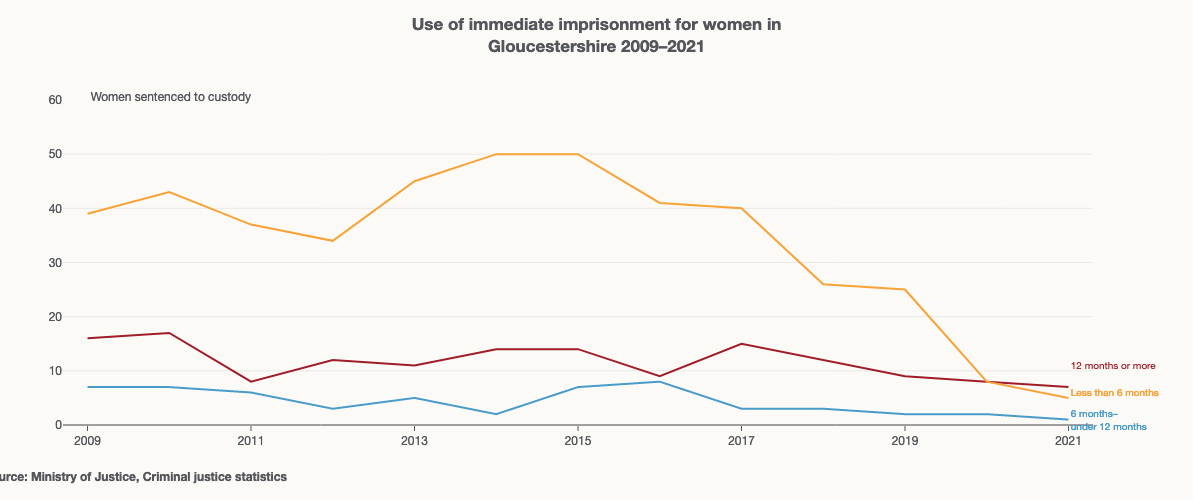

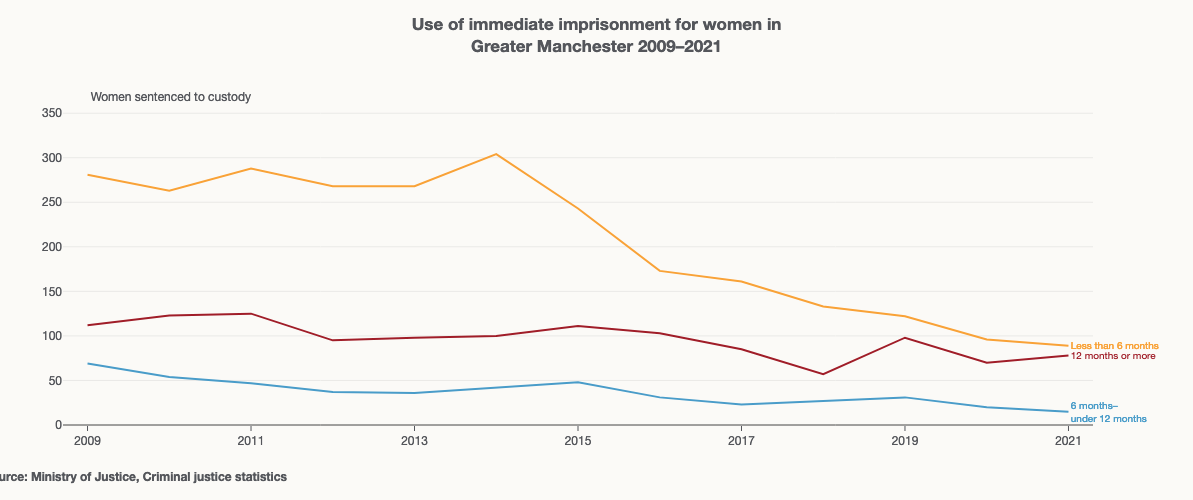

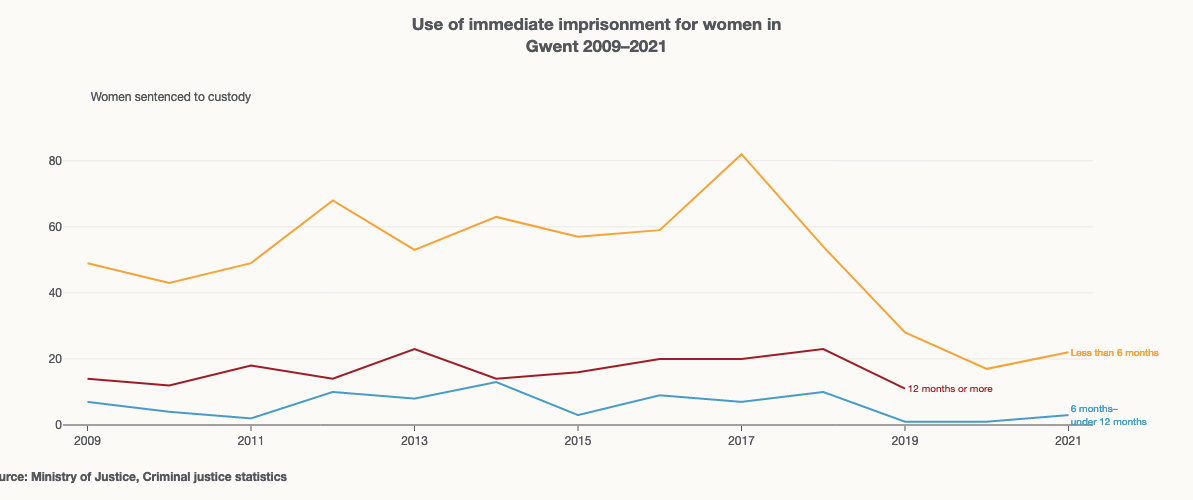

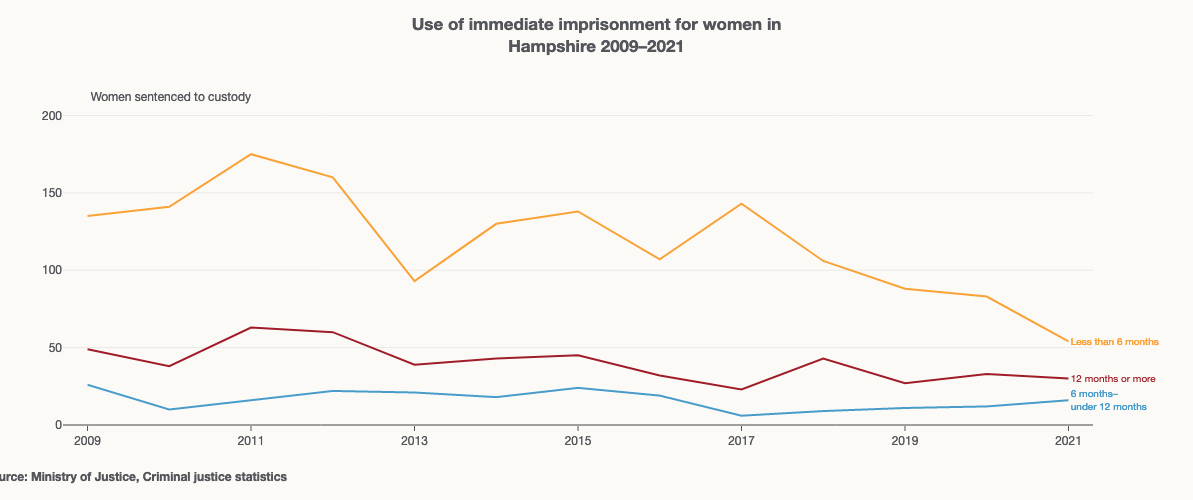

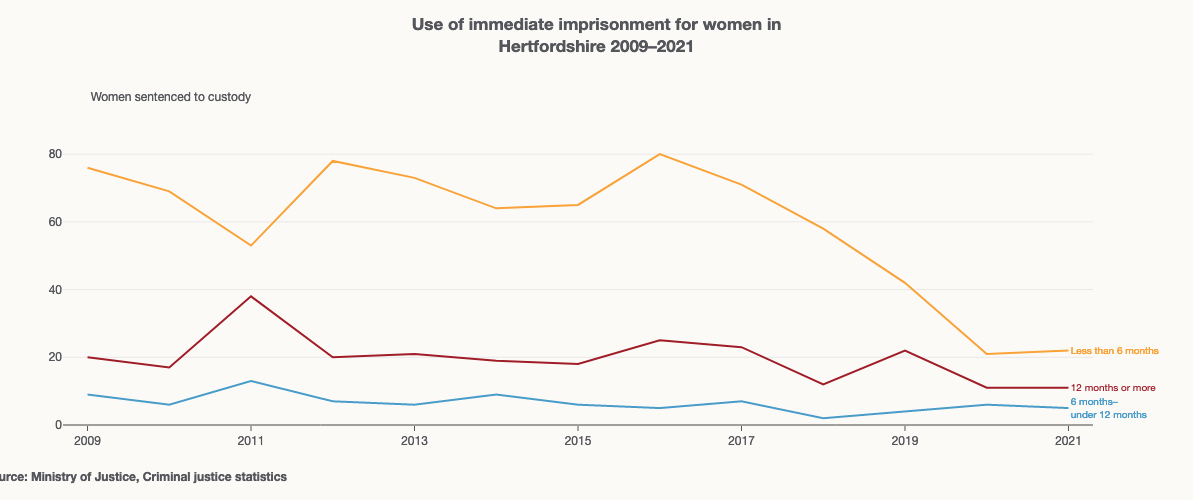

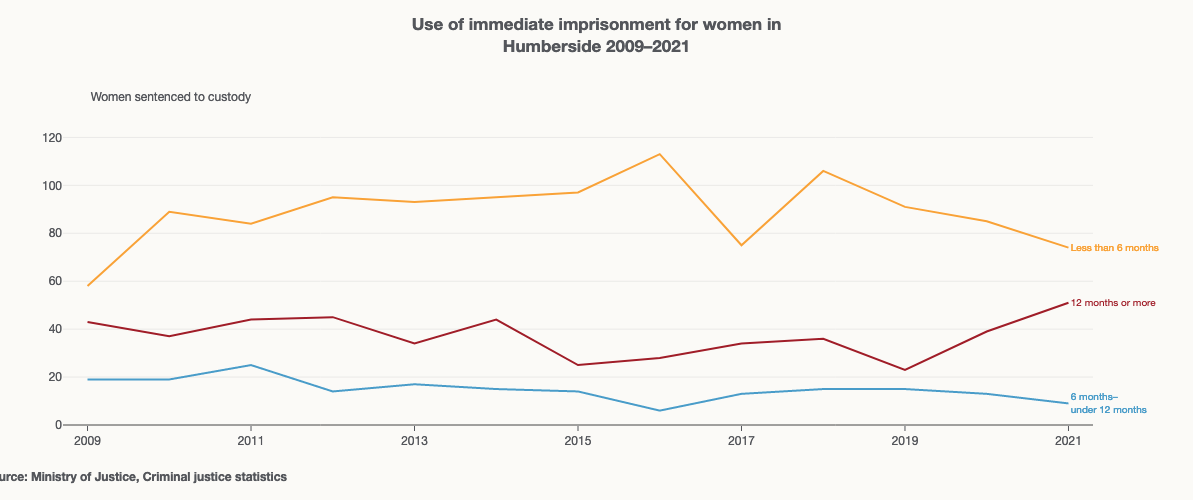

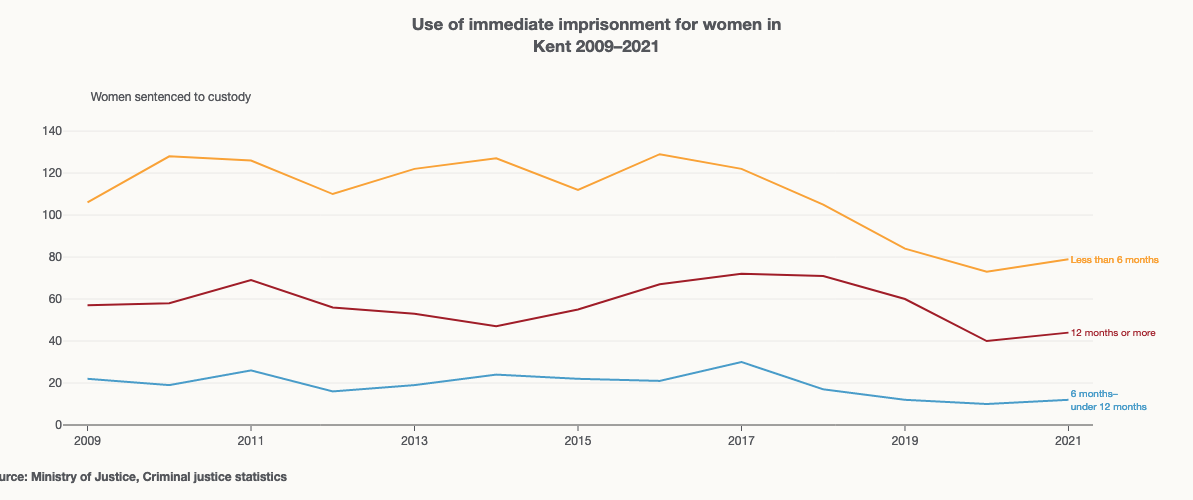

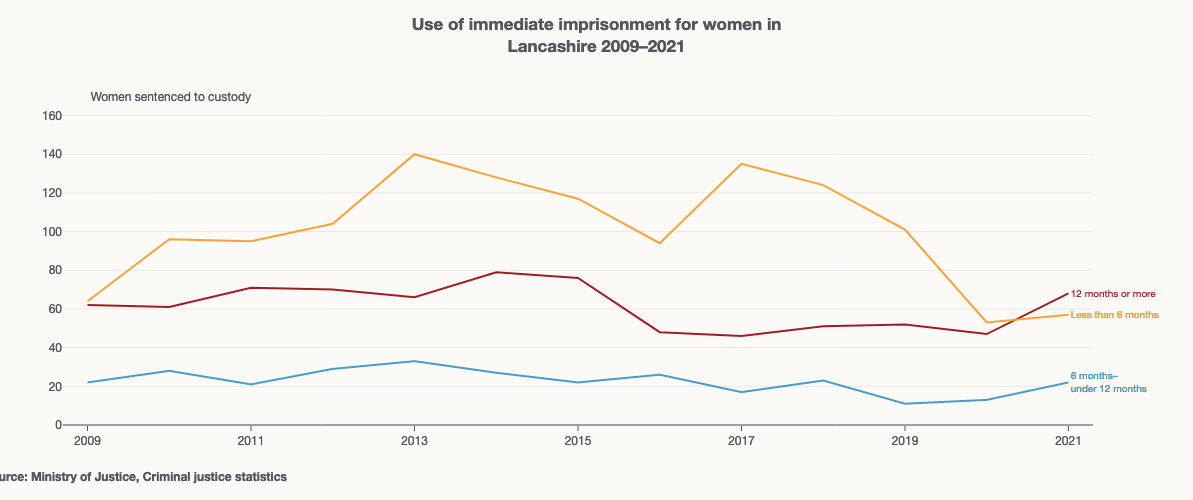

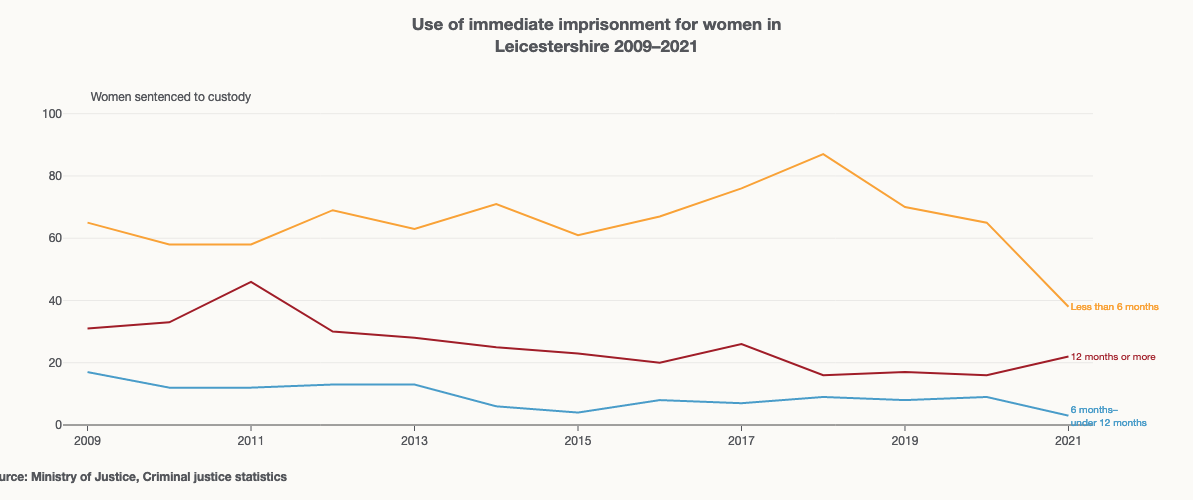

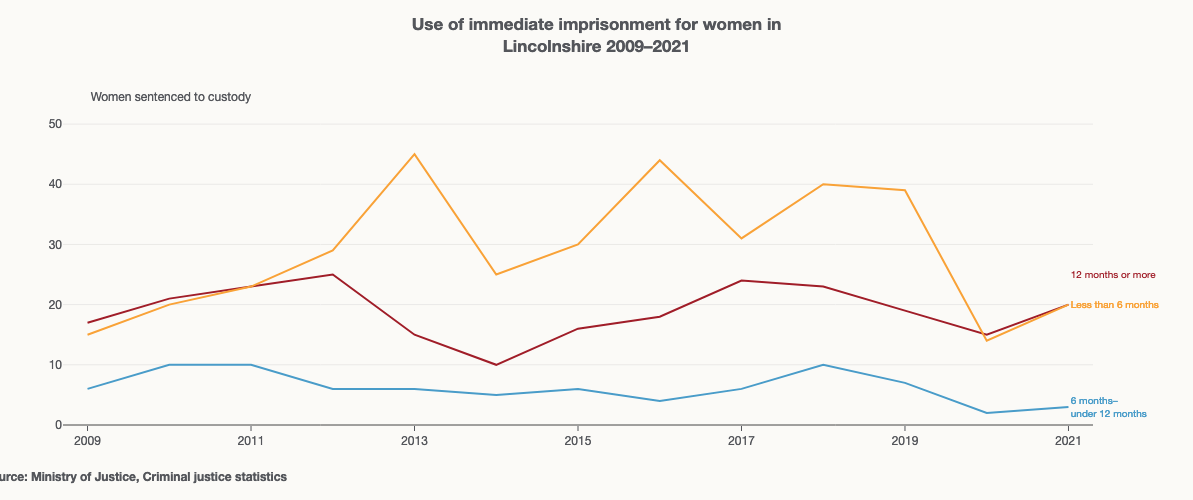

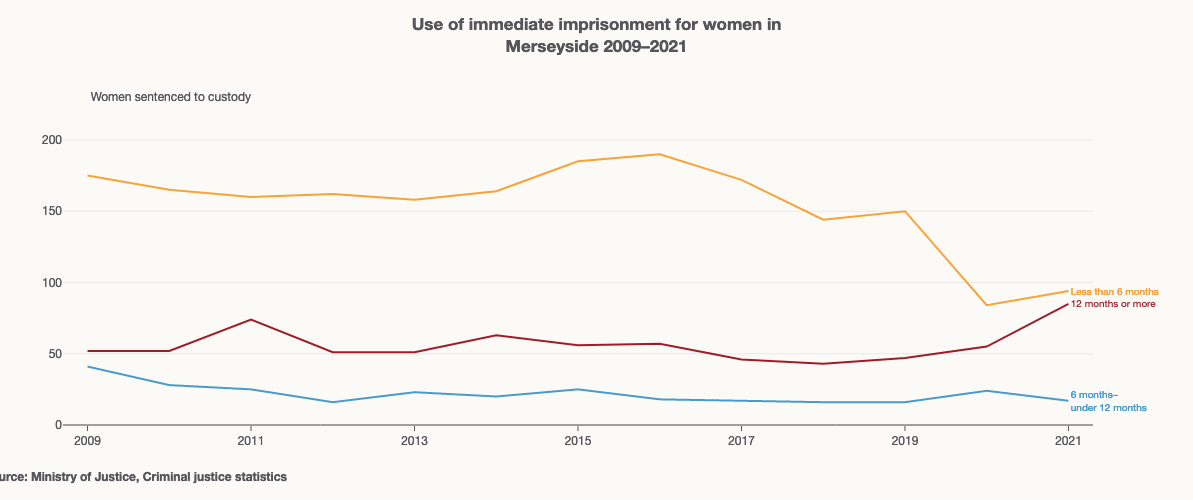

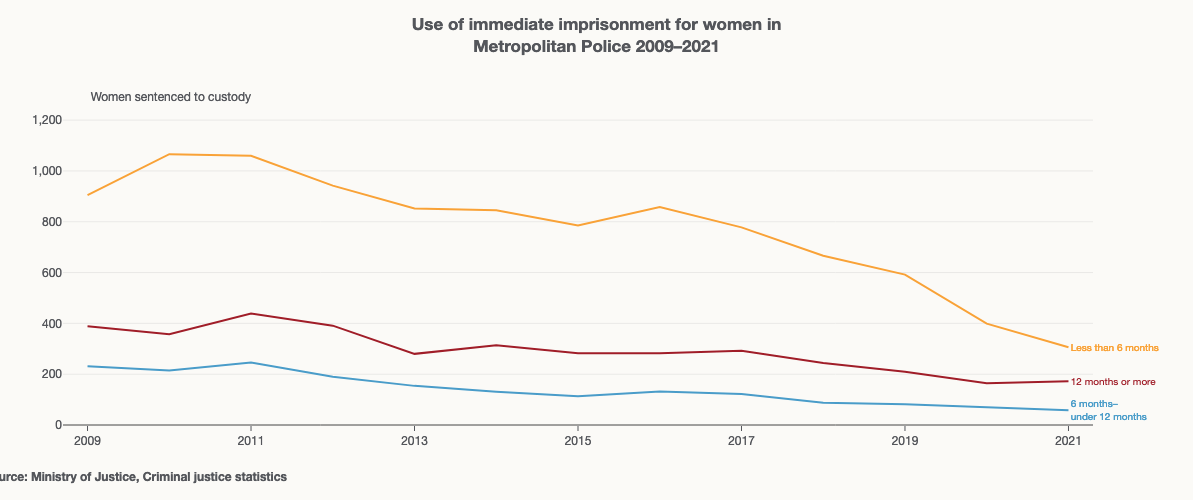

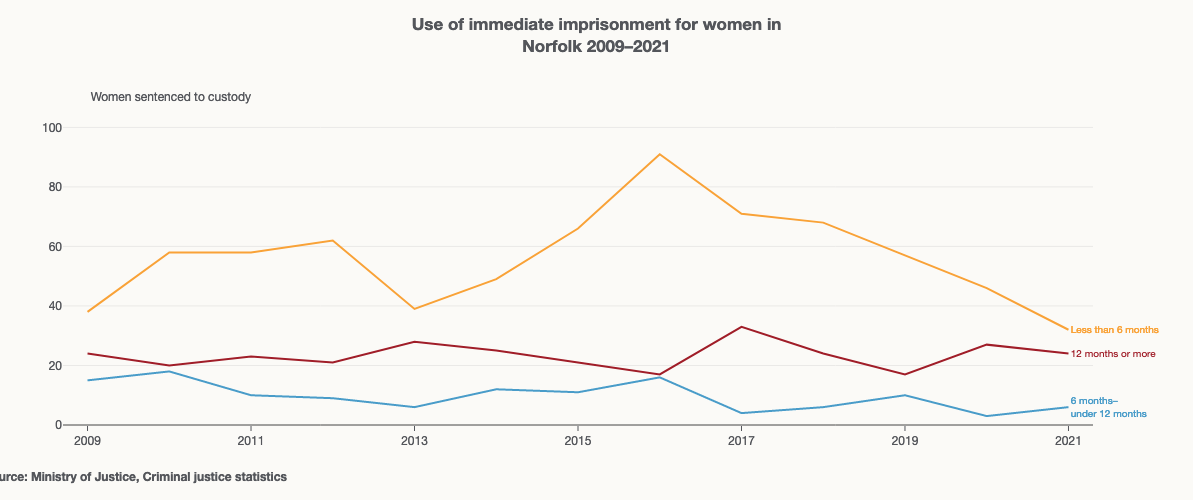

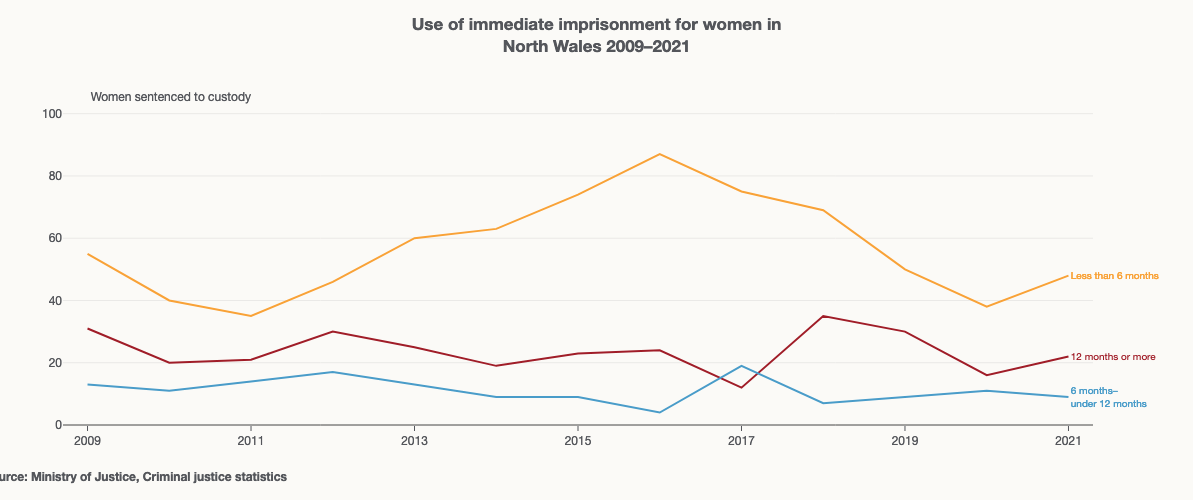

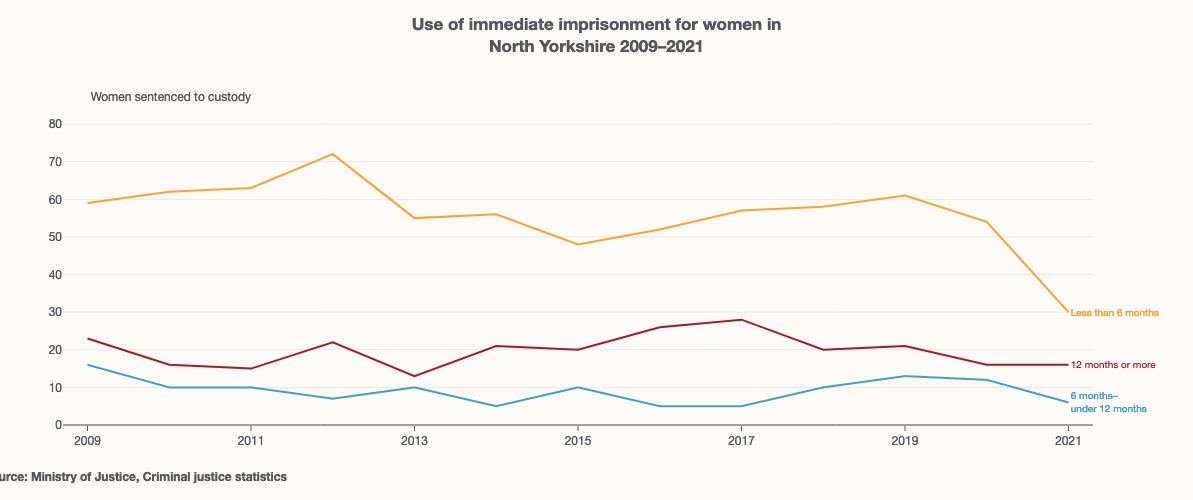

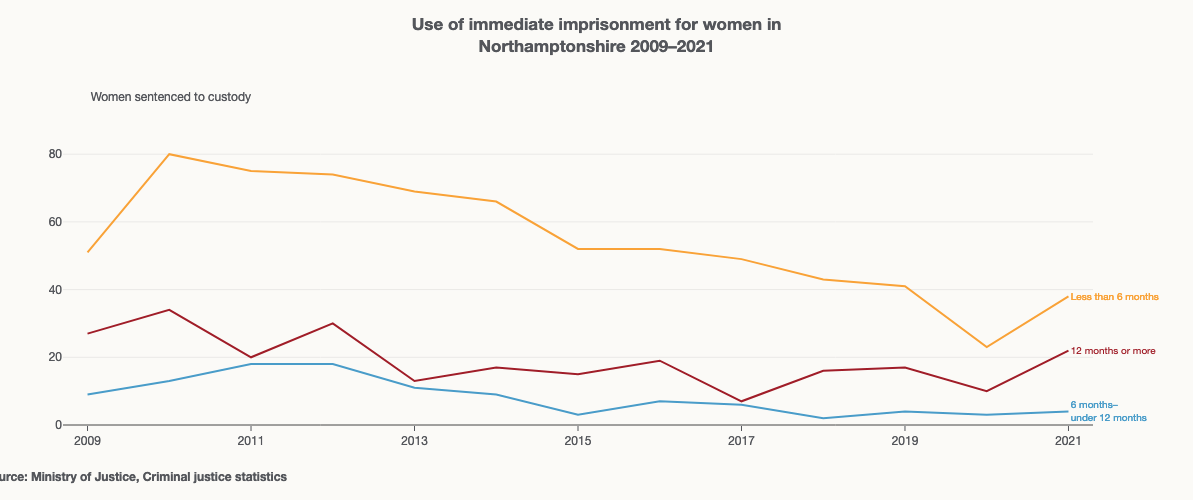

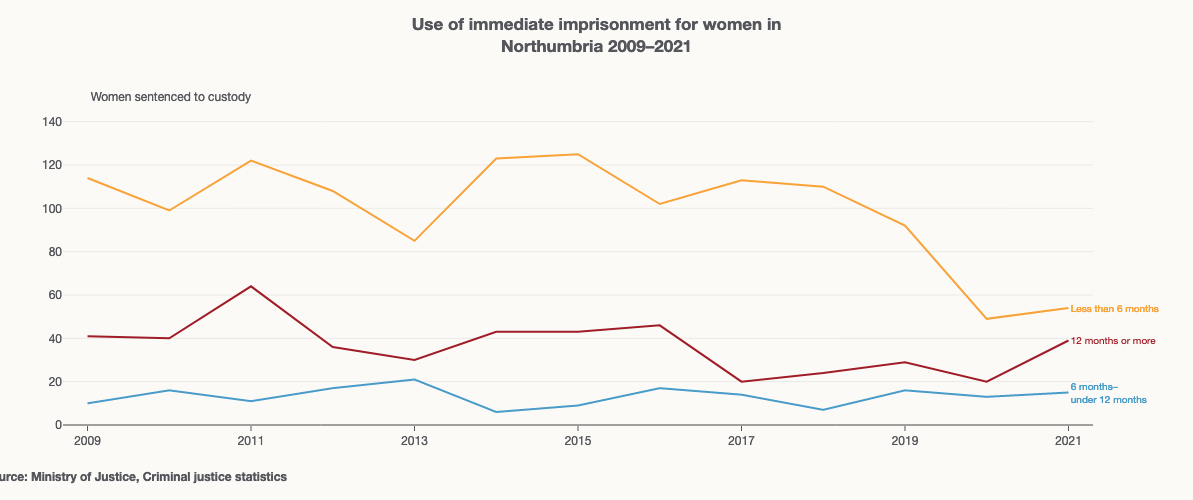

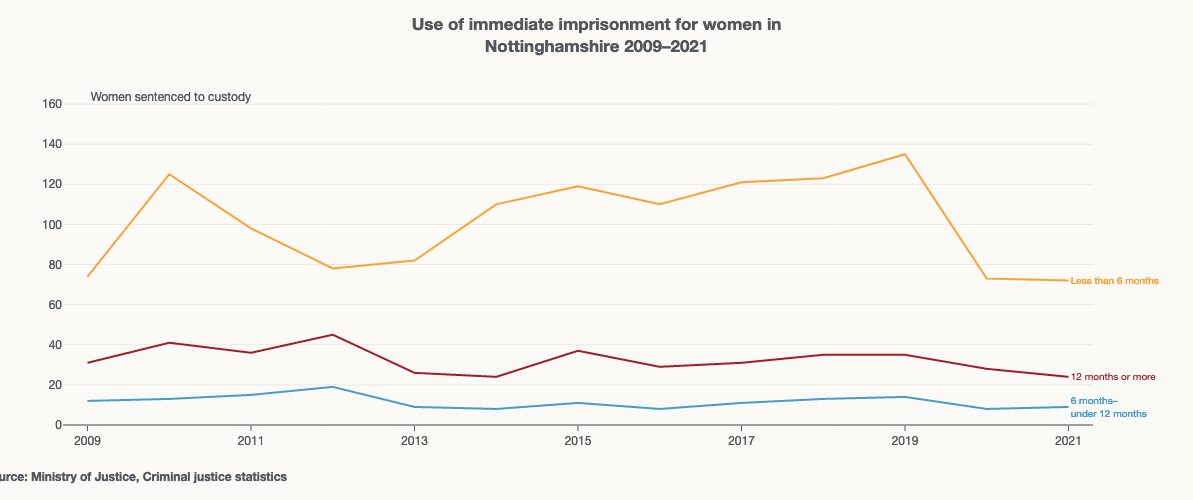

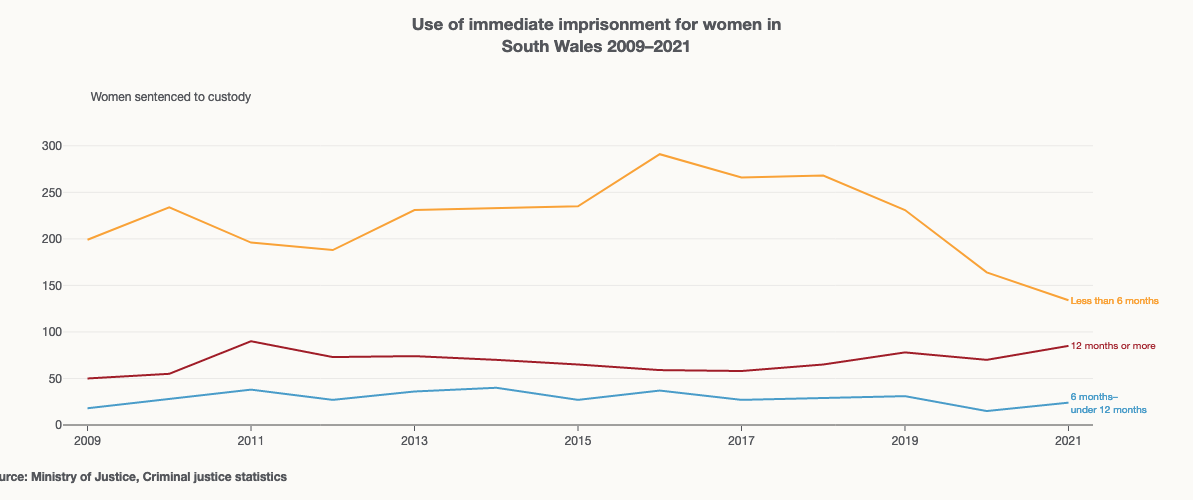

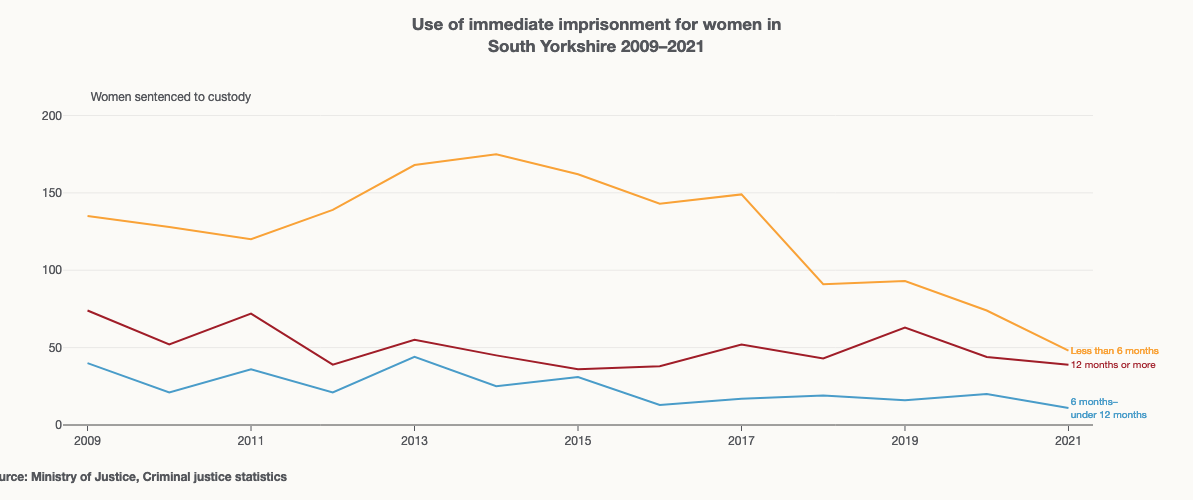

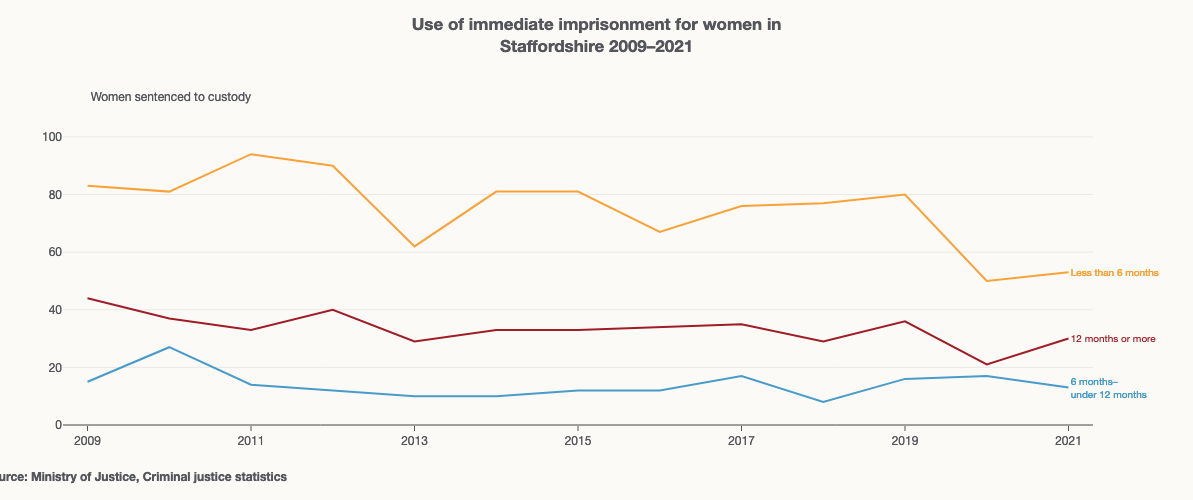

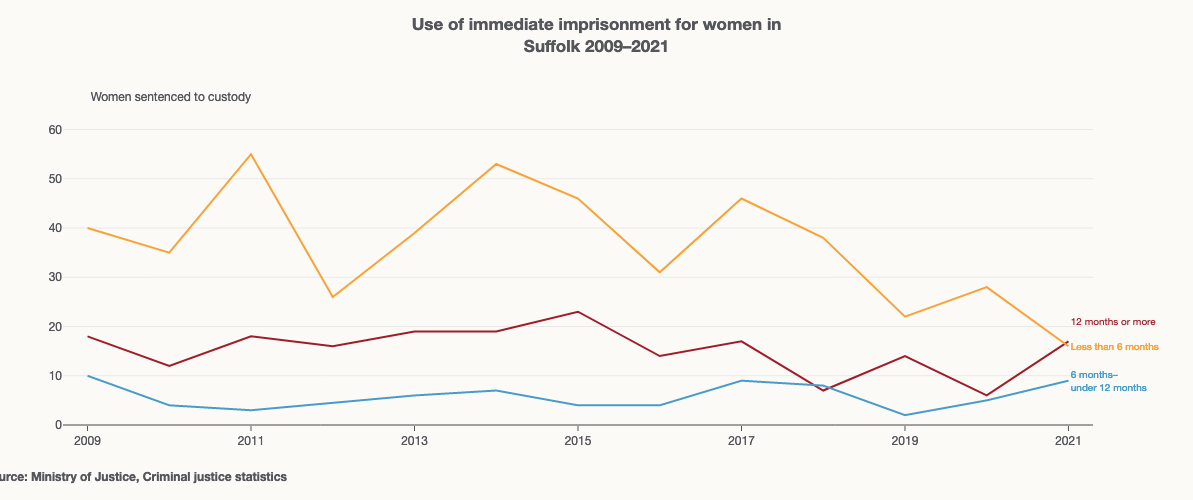

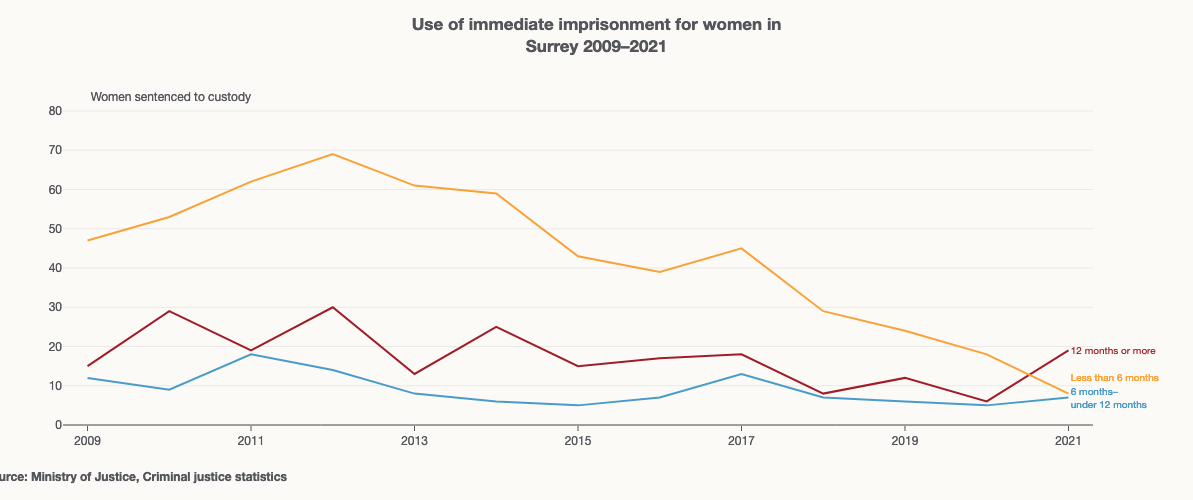

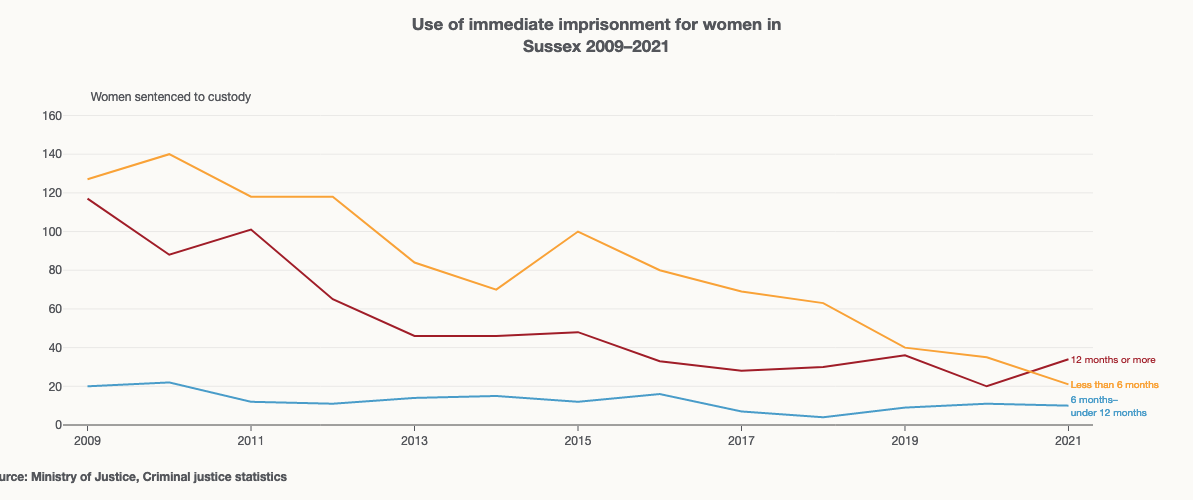

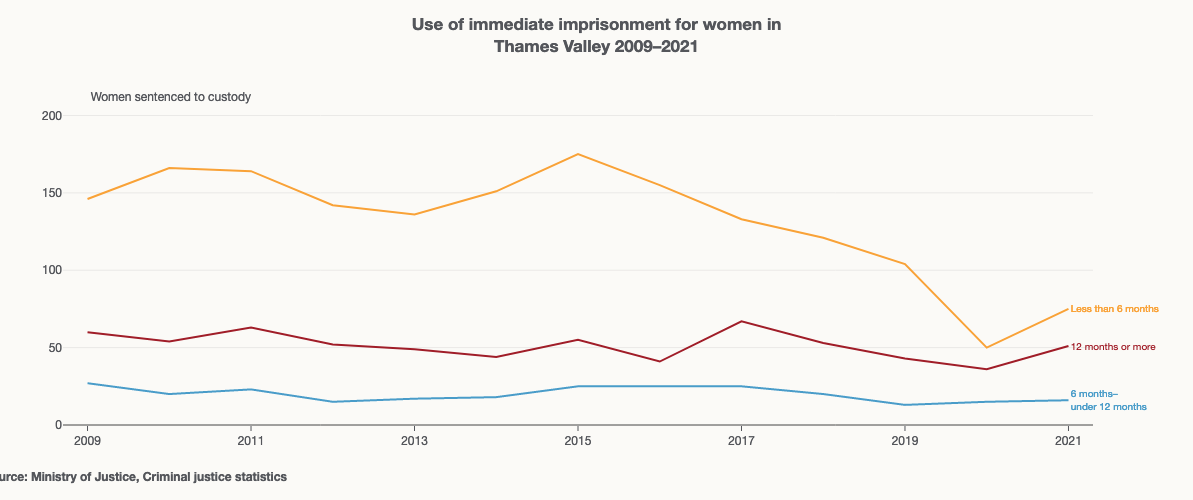

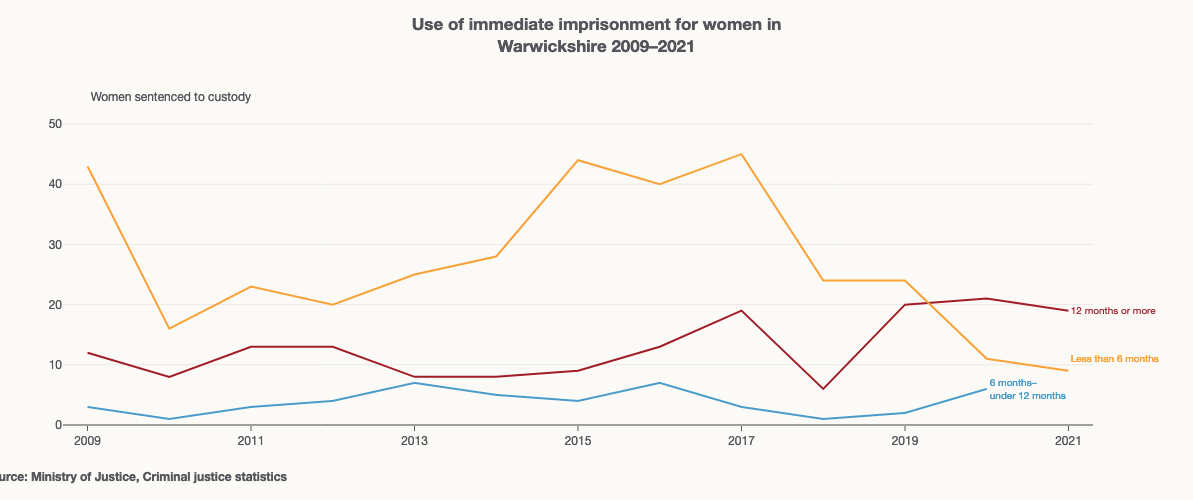

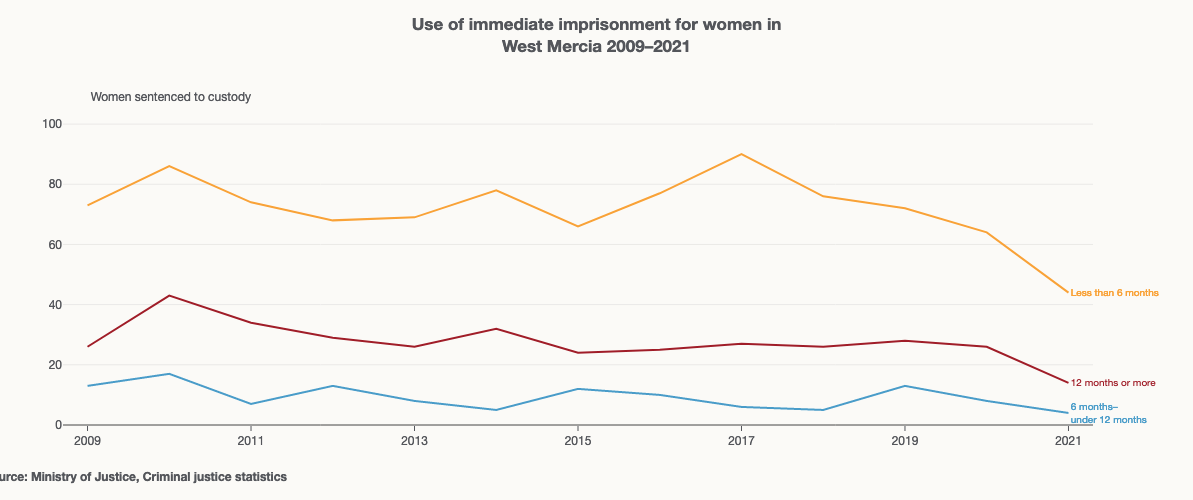

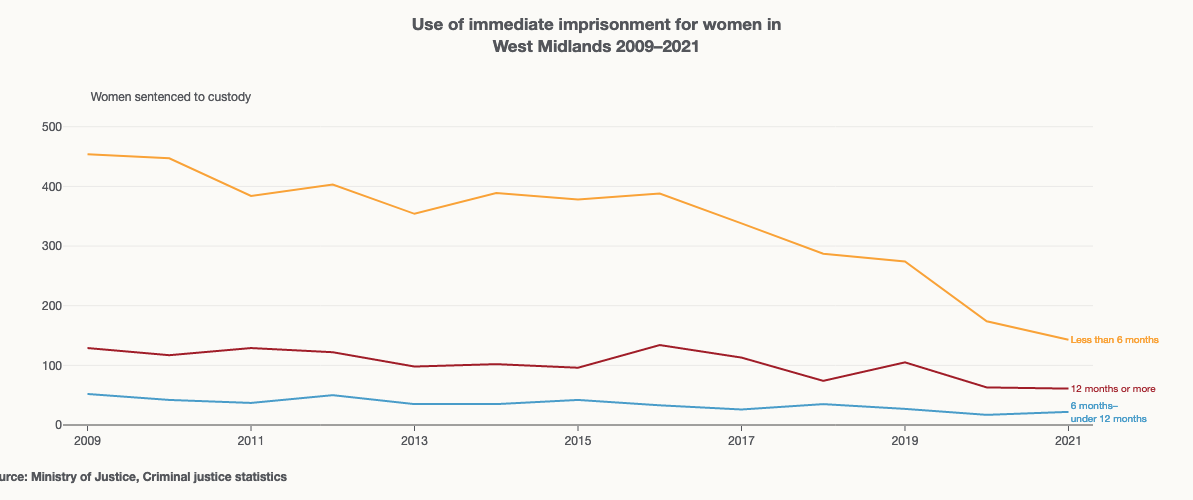

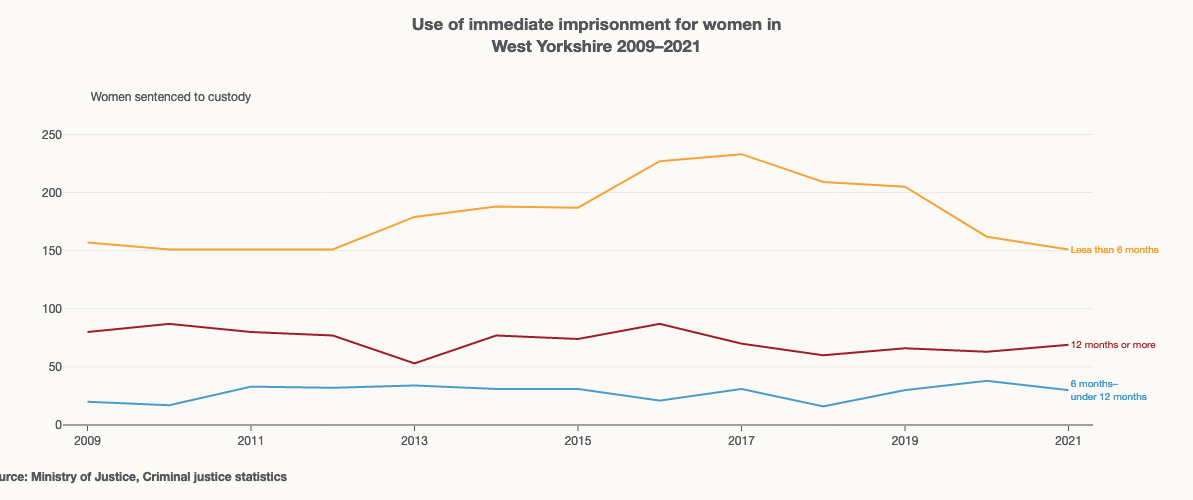

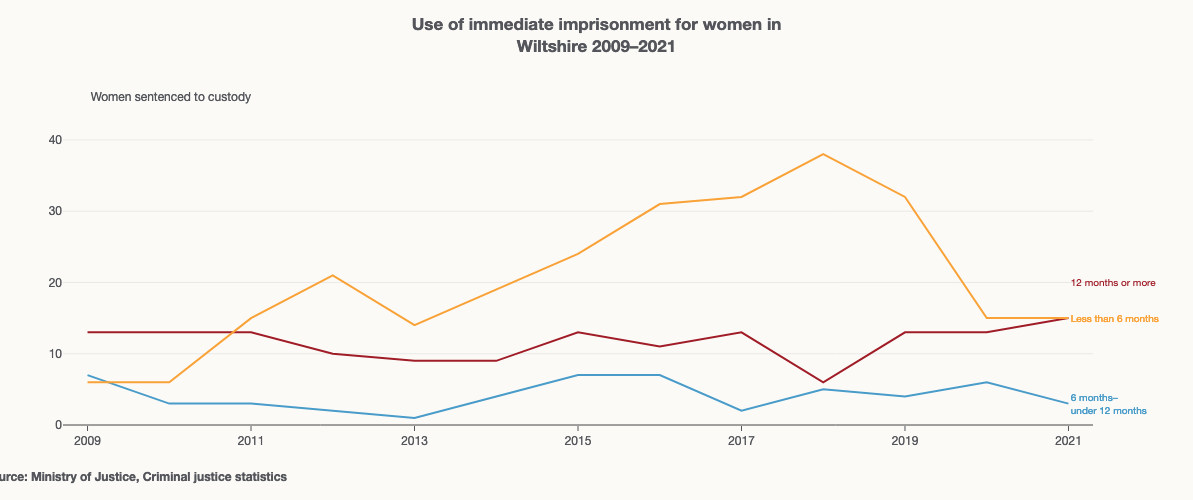

In [26]:
for pfa in df['pfa'].unique():
    pfa_df = df[df["pfa"] == pfa]
    trace_list = [] # Need to empty my trace_list with every loop through each PFA so that charts are plotted separately
    fig = go.Figure() # Need to also instantiate the figure with every loop in order to clear fig.data values

    for i in pfa_df["sentence_len"].unique():  # Creating a for loop to extract unique values from the dataframe and make traces
        pfa_df_sentence = pfa_df[pfa_df["sentence_len"] == i]
        
        trace = go.Scatter(
            x=pfa_df_sentence["year"],
            y=pfa_df_sentence["freq"],
            mode="lines",
            name=str(pfa_df_sentence["sentence_len"].iloc[0]),
            meta=pfa_df_sentence["pfa"].iloc[0],   # Adding name of PFA in metadata to ensure data relates to only one area 
            hovertemplate="%{y}<extra></extra>"
        )

        trace_list.append(trace)

    fig.add_traces(trace_list)

    ## Chart title
    title = textwrap.wrap(f'<b>Use of immediate imprisonment for women in {pfa_df_sentence["pfa"].iloc[0]} 2009–2021</b>', width=45)

    fig.update_layout(
        margin=dict(l=63, b=75, r=100),
        title="<br>".join(title),
        title_y=0.94,
        title_yanchor="bottom",
        yaxis_title="",
        yaxis_tickformat=",.0f",
        yaxis_tick0=0,
        yaxis_nticks=9,
        xaxis_dtick=2,
        xaxis_tick0=2009,    
        xaxis_showgrid=False,
        xaxis_tickcolor="#54565B",
        template=prt_template,
        showlegend=False,
        hovermode="x",
        modebar_activecolor="#A01D28",
        width=655,
        height=500,
    )

    ## Chart annotations
    annotations = []

    # Adding trace annotations
    for j in range(0, len(trace_list)):
        annotations.append(
            dict(
                xref="x",
                yref="y",
                x=fig.data[j].x[-1],
                y=fig.data[j].y[-1],
                text=str(fig.data[j].name),
                xanchor="left",
                align="left",
                showarrow=False,
                font_color=prt_template.layout.colorway[j],
                font_size=10,
            )
        )

    # Adding source label
    annotations.append(
        dict(
            xref="paper",
            yref="paper",
            x=-0.08,
            y=-0.19,
            align="left",
            showarrow=False,
            text="<b>Source: Ministry of Justice, Criminal justice statistics</b>",
            font_size=12,
        )
    )

    # Adding y-axis label
    annotations.append(
        dict(
            xref="x",
            yref="paper",
            x=df['year'].iloc[0],
            y=1.04,
            align="left",
            xanchor="left",
            showarrow=False,
            text="Women sentenced to custody",
            font_size=12,
        )
    )
    
    # Checking for overlapping annotations on trace labels
    y_vals = annotation_yvals()
    
    space = 5
    if check_overlap(y_vals, space) == False:
        adjust_overlap(y_vals, space)
    
    # Adding annotations to layout
    fig.update_layout(annotations=annotations)

    ## Setting chart axis ranges
    for i in range(len(fig.data)):
        max_trace = (fig.data[i].y).max()
    
    fig.update_yaxes(range=[0, max_trace + (max_trace * 0.2)])
    fig.update_xaxes(range=[2008.7, 2021.3])

    fig.show(config=config)

    ## Exporting to static image

    # Save results to ../reports/figures/custody_sentence_lengths, generate if does not exist.
    export_path = Path.joinpath(Path.cwd().parent, "reports", "figures", "custody_sentence_lengths")
    export_path.mkdir(parents=True, exist_ok=True)

    # Setting filename variable and full path

    filename = str(pfa_df_sentence["pfa"].iloc[0])
    export_svg_path = Path.joinpath(export_path, f'{filename}' + '.svg')

    # fig.write_image(export_svg_path)